In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../Police_Department_Incident_Reports.csv")

In [3]:
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,146196161,NON-CRIMINAL,LOST PROPERTY,Tuesday,09/23/2014,01:00,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,POINT (-122.403404791479 37.775420706711),14619616171000
1,150045675,ASSAULT,BATTERY,Thursday,01/15/2015,17:00,TARAVAL,NONE,1800 Block of VICENTE ST,-122.485604,37.738821,POINT (-122.48560378101 37.7388214326705),15004567504134
2,140632022,SUSPICIOUS OCC,INVESTIGATIVE DETENTION,Wednesday,07/30/2014,09:32,BAYVIEW,NONE,100 Block of GILLETTE AV,-122.396535,37.710660,POINT (-122.396535107224 37.7106603302503),14063202264085
3,150383259,ASSAULT,BATTERY,Saturday,05/02/2015,23:10,BAYVIEW,"ARREST, BOOKED",2400 Block of PHELPS ST,-122.400131,37.730093,POINT (-122.400130573297 37.7300925390327),15038325904134
4,40753980,OTHER OFFENSES,RECKLESS DRIVING,Friday,07/02/2004,13:43,BAYVIEW,NONE,I-280 / CESAR CHAVEZ ST,-120.500000,90.000000,POINT (-120.5 90),4075398065020


In [4]:
df.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'],
      dtype='object')

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
focuscrimes

{'ASSAULT',
 'BURGLARY',
 'DISORDERLY CONDUCT',
 'DRIVING UNDER THE INFLUENCE',
 'DRUG/NARCOTIC',
 'DRUNKENNESS',
 'LARCENY/THEFT',
 'PROSTITUTION',
 'ROBBERY',
 'STOLEN PROPERTY',
 'TRESPASS',
 'VANDALISM',
 'VEHICLE THEFT',
 'WEAPON LAWS'}

#### Weekly plots

Illustration of the weekly crime pattern of the San Francisco area over the entire time period. 
Code is made by first looping over elements in focuscrimes and then sort for each elem the size of each weekday. 

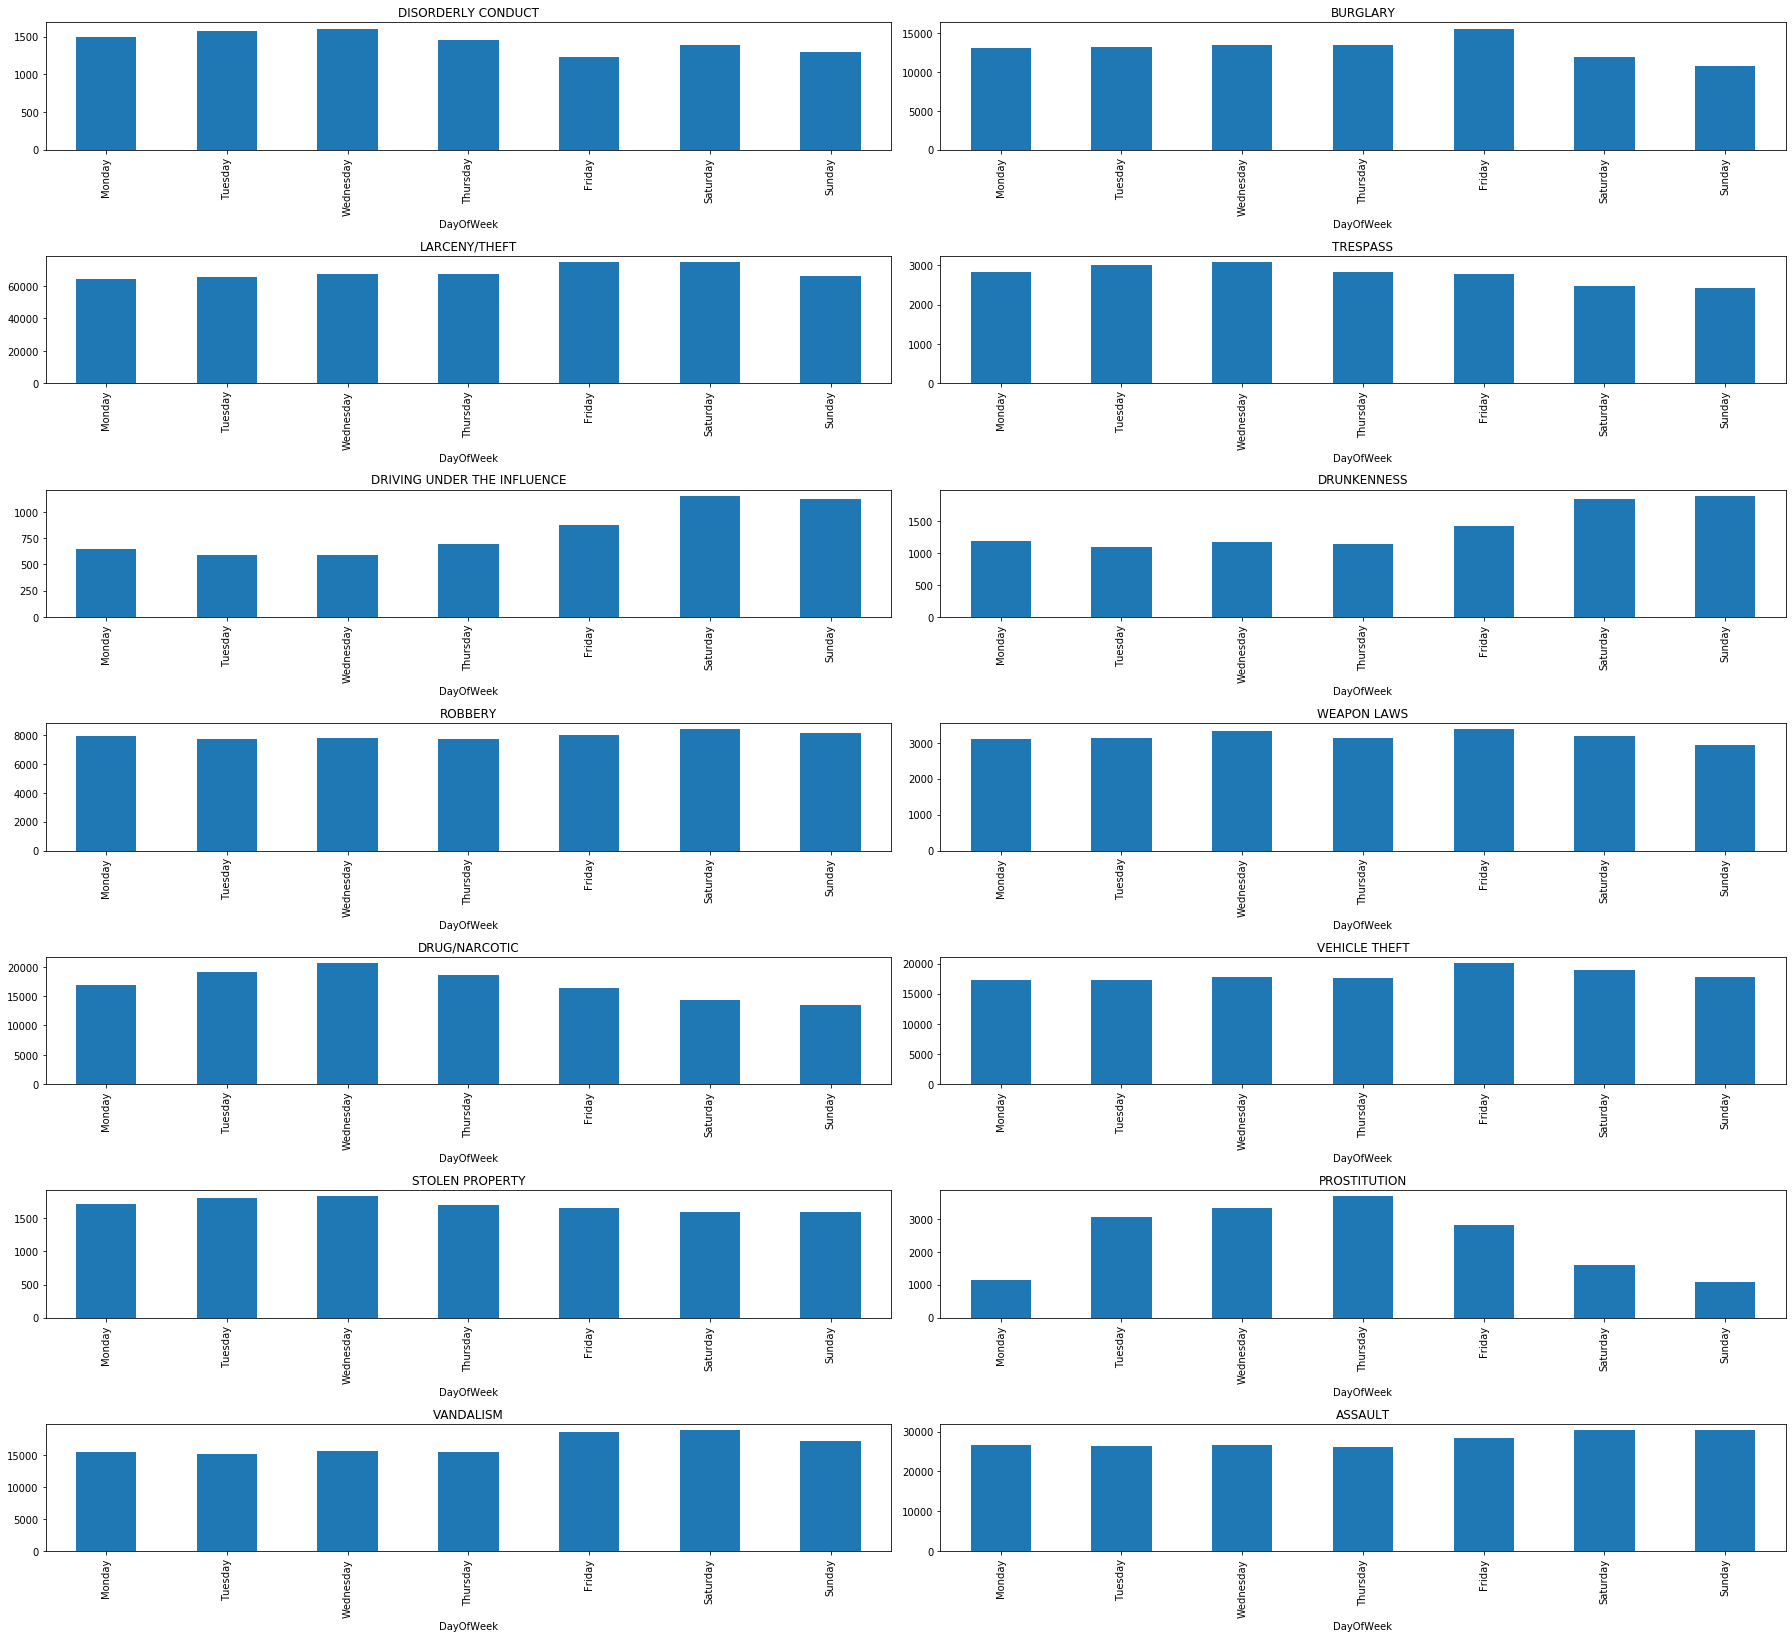

In [63]:
Weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
# df_weekday = df.groupby(['DayOfWeek']).size().reindex(cats)

plt.figure(figsize=(25,25))
for i, elem in enumerate(focuscrimes):
    plt.subplot(8,2,i+1)
    df_week = df[df['Category'] == elem]  #Loop over focuscrimes. 
    df_week.groupby(['DayOfWeek']).size().reindex(Weekday).plot(kind='bar') # 
    plt.title(elem)
plt.tight_layout()
plt.show()

#### Monthly changes

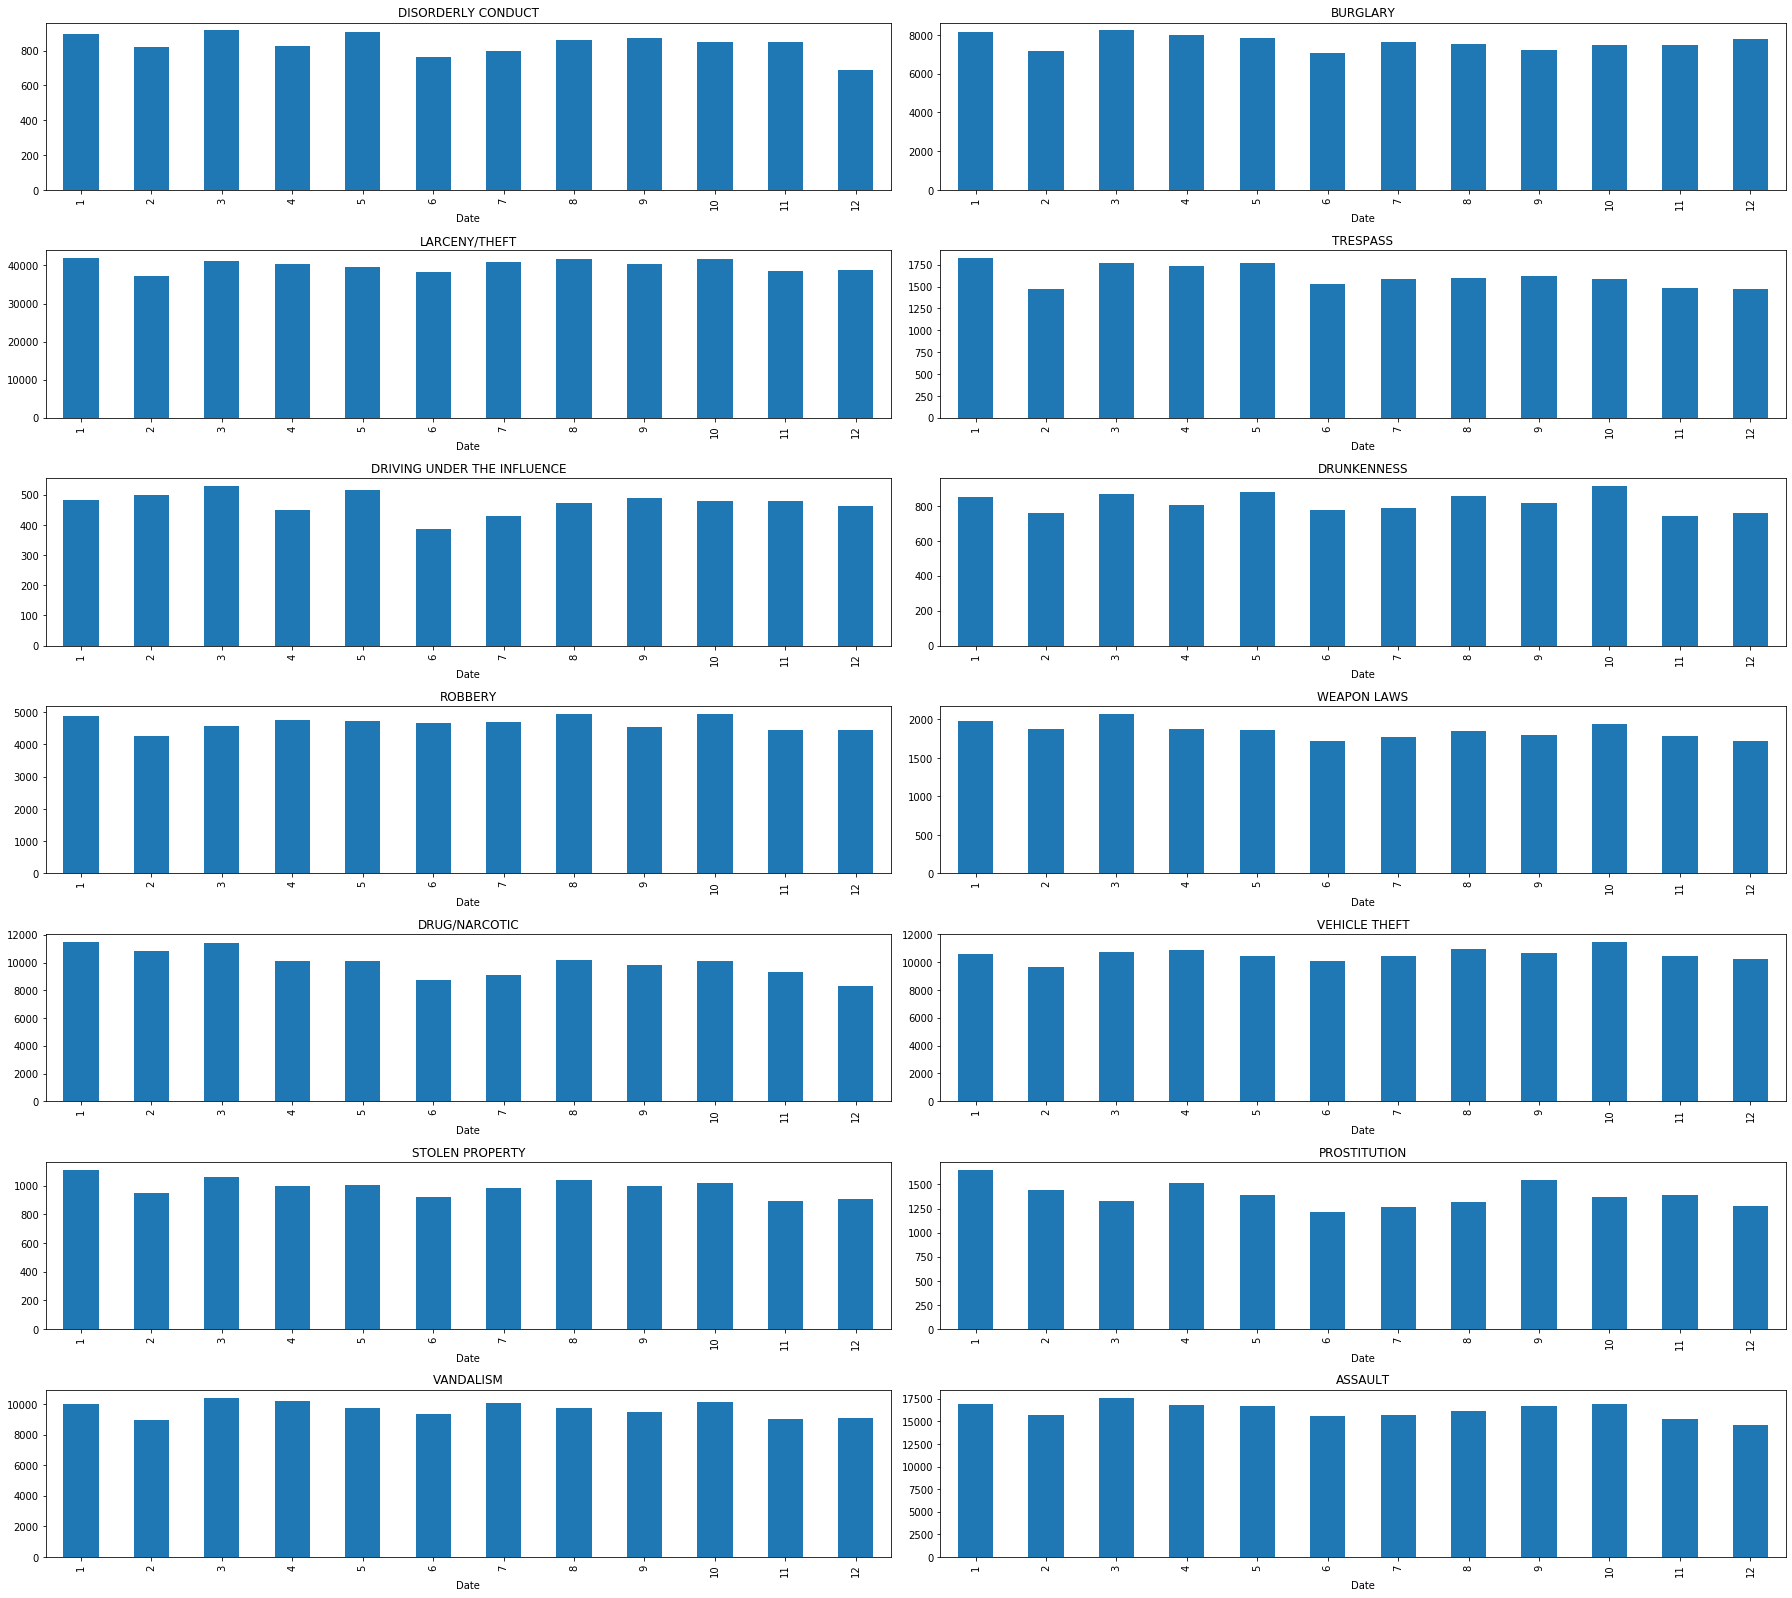

In [65]:
plt.figure(figsize=(25,25))
for i, elem in enumerate(focuscrimes):
    plt.subplot(8,2,i+1)
    df_month = df[df['Category'] == elem]
    df_month.groupby(df['Date'].dt.month).size().plot(kind='bar')
    plt.title(elem)
plt.tight_layout()
plt.show()

#### Hourly Change

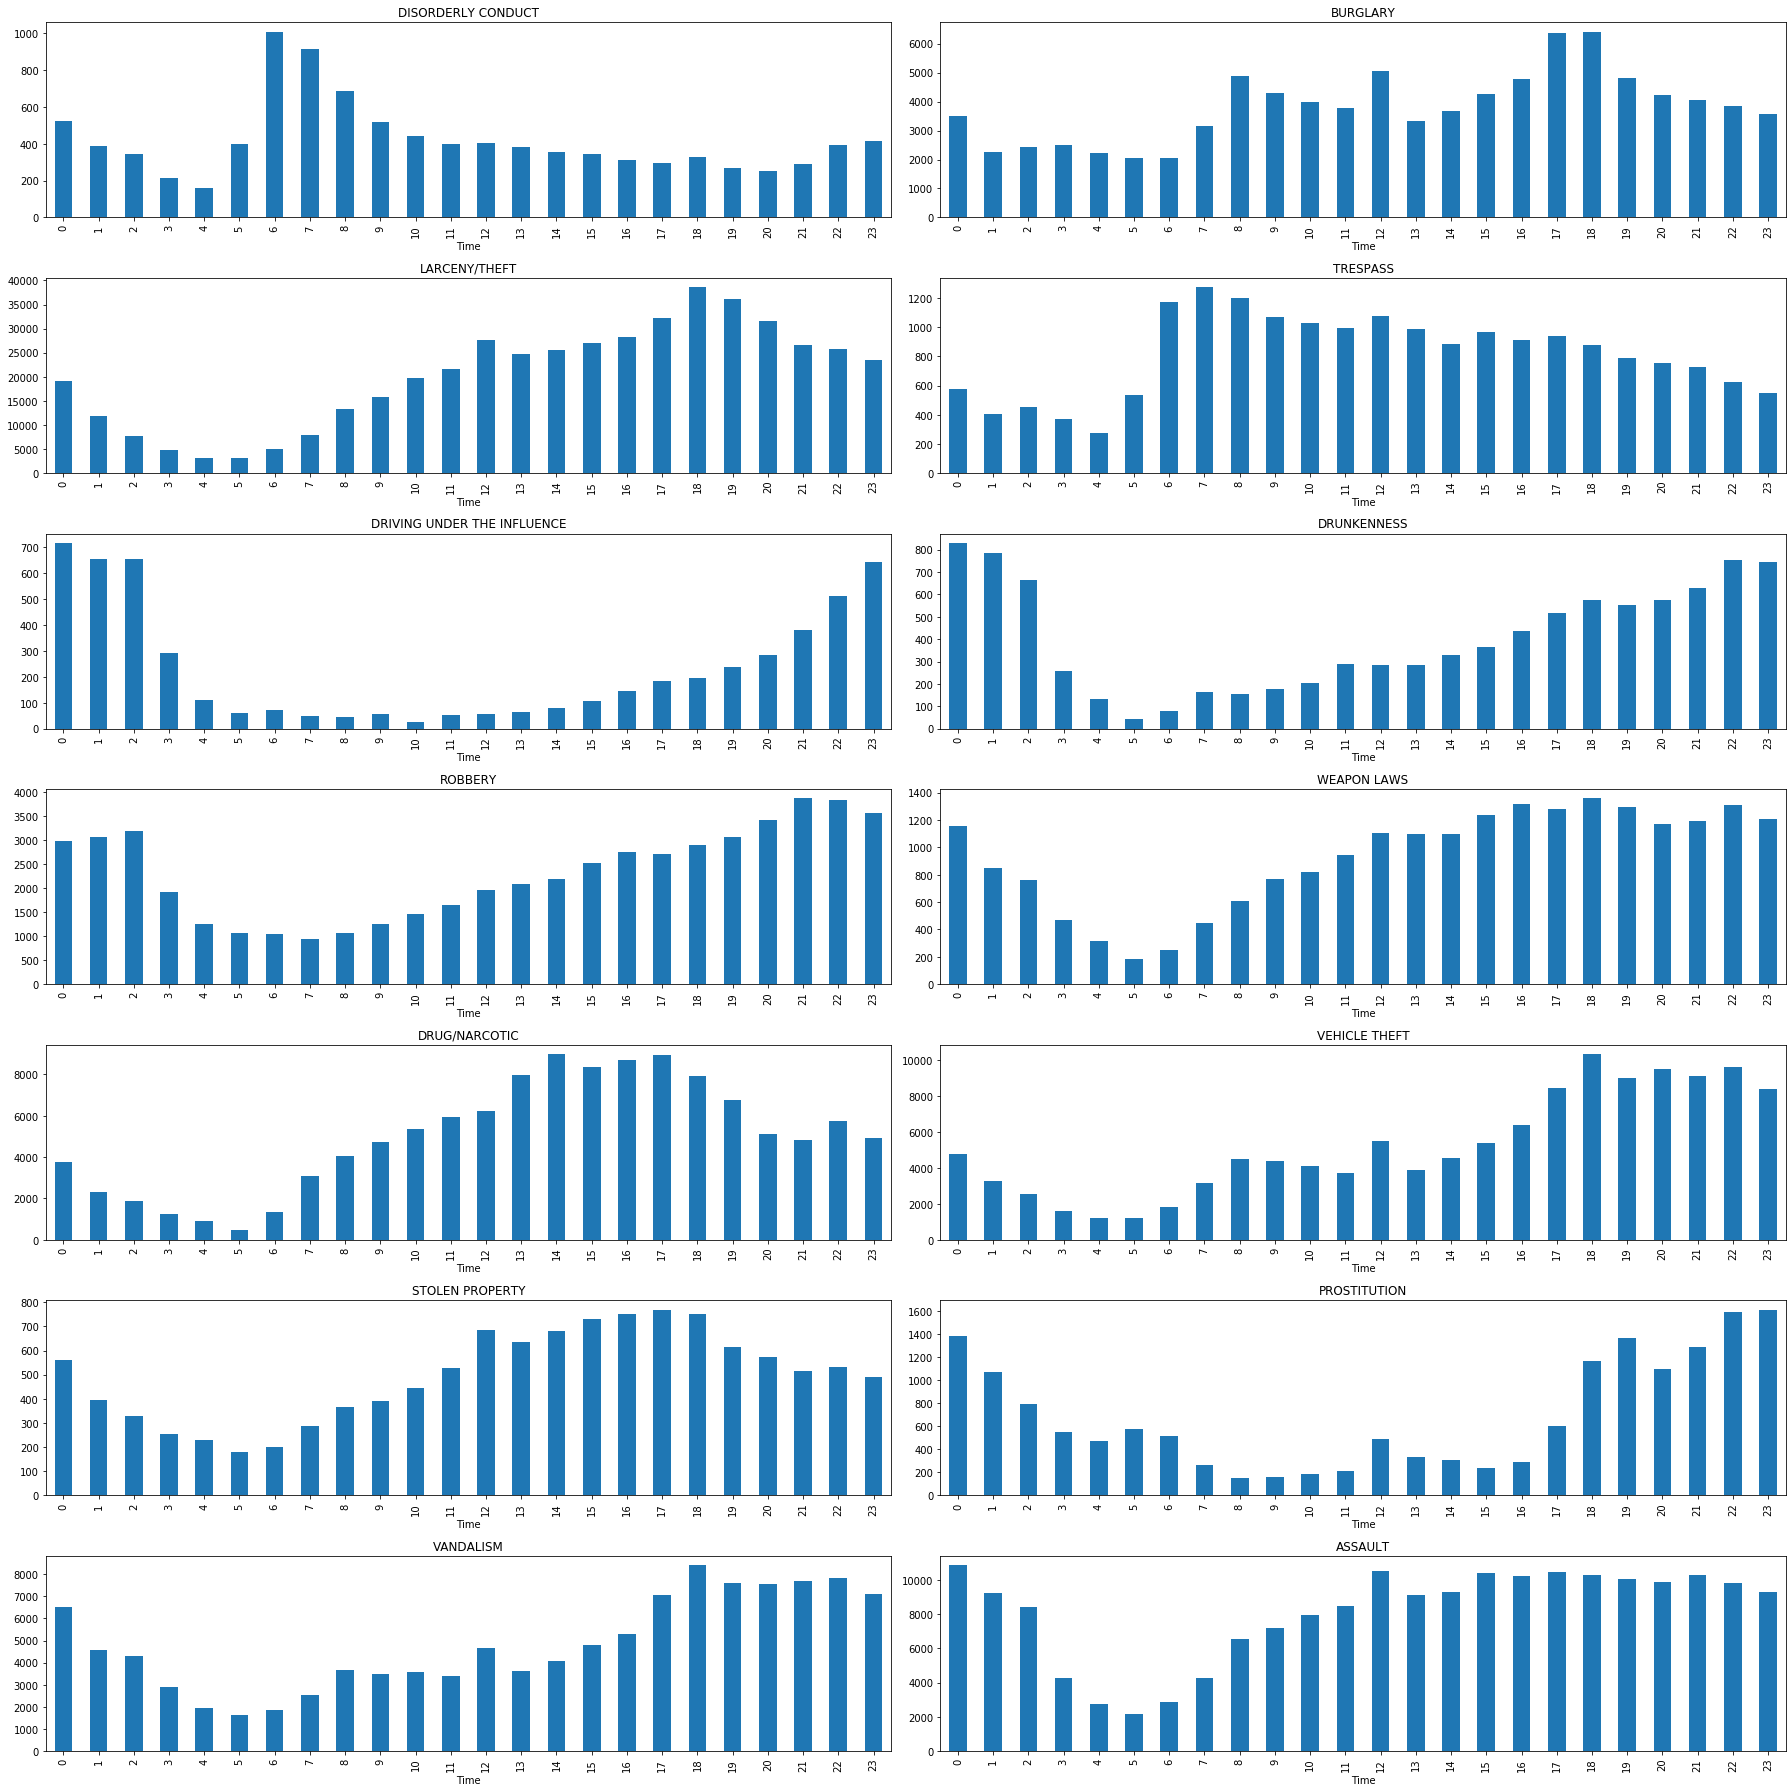

In [12]:
df['Time'] = pd.to_datetime(df['Time'])

plt.figure(figsize=(25,25))
for i, elem in enumerate(focuscrimes):
    plt.subplot(7,2,i+1)
    df_hour = df[df['Category'] == elem]
    df_hour.groupby(df['Time'].dt.hour).size().plot(kind='bar')
    plt.title(elem)
plt.tight_layout()
plt.show()

#### 168 hours span

In [73]:
from pandas.api.types import CategoricalDtype

DayOfWeek = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DayOfWeek'] =df['DayOfWeek'].astype(CategoricalDtype(categories=DayOfWeek))

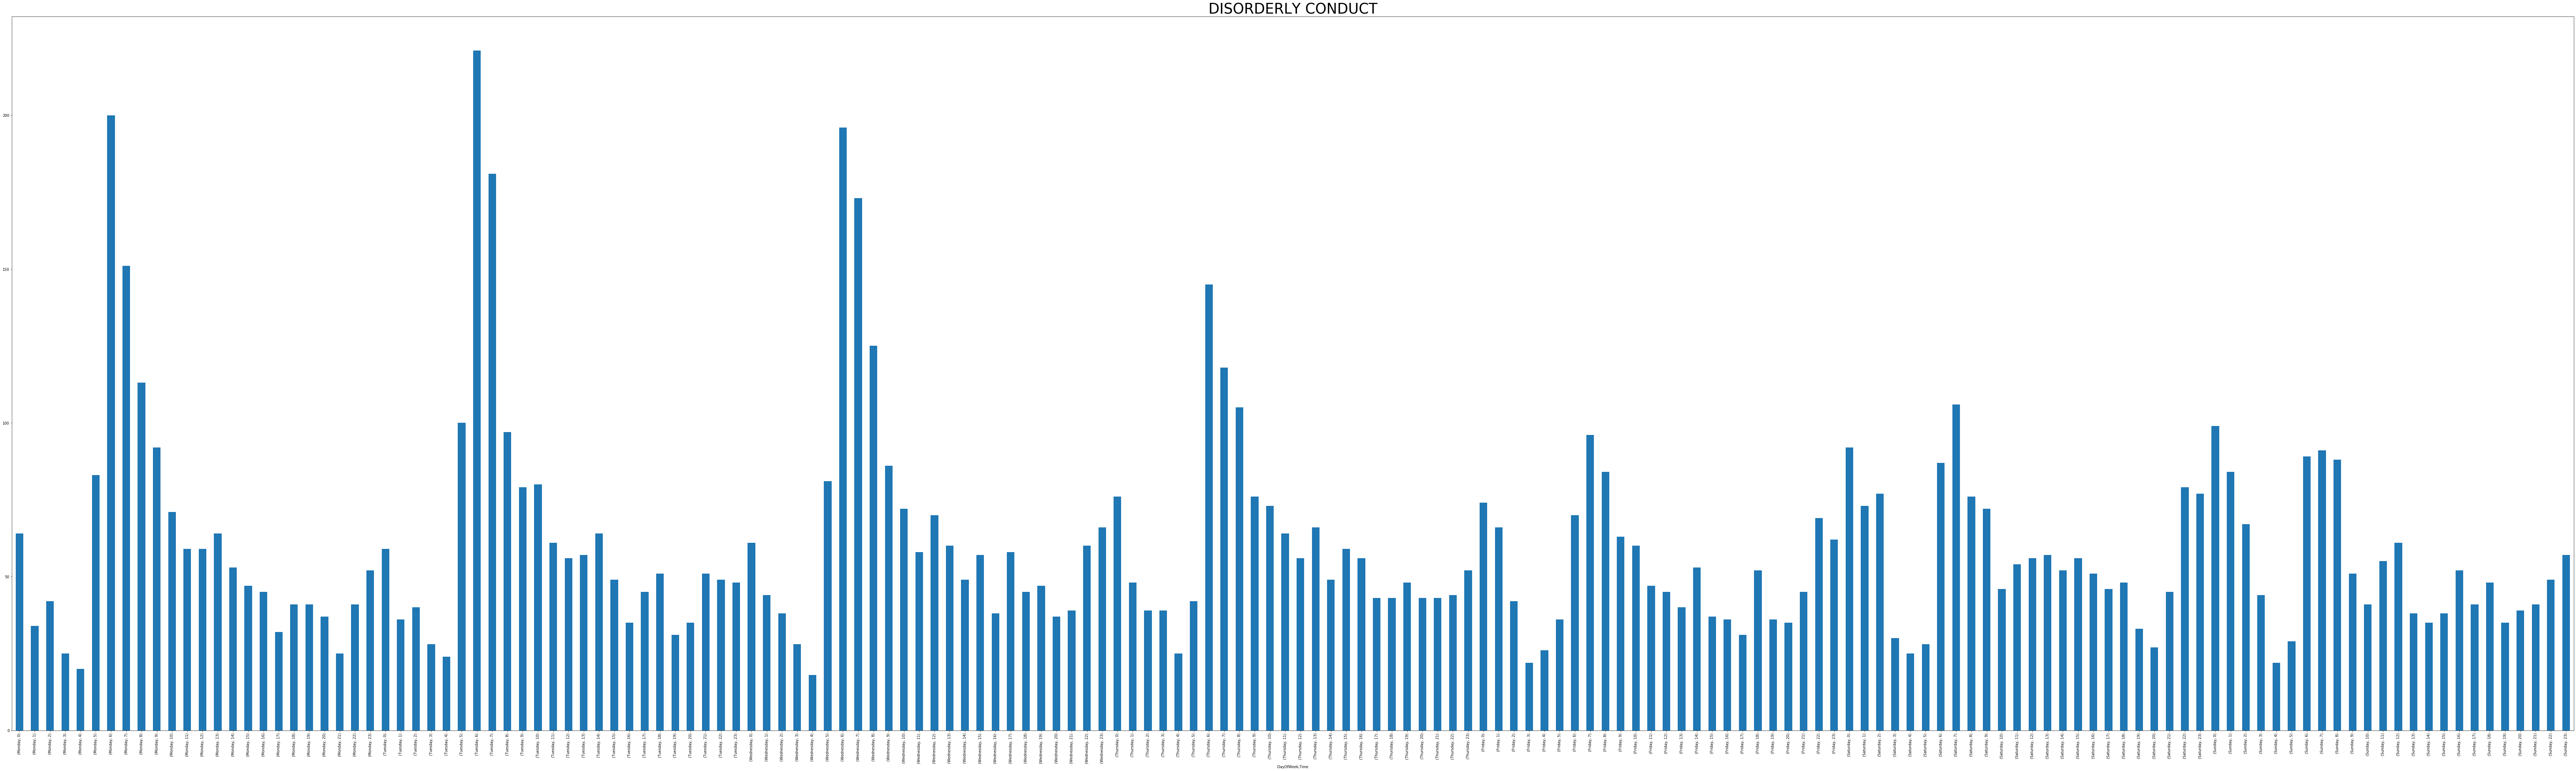

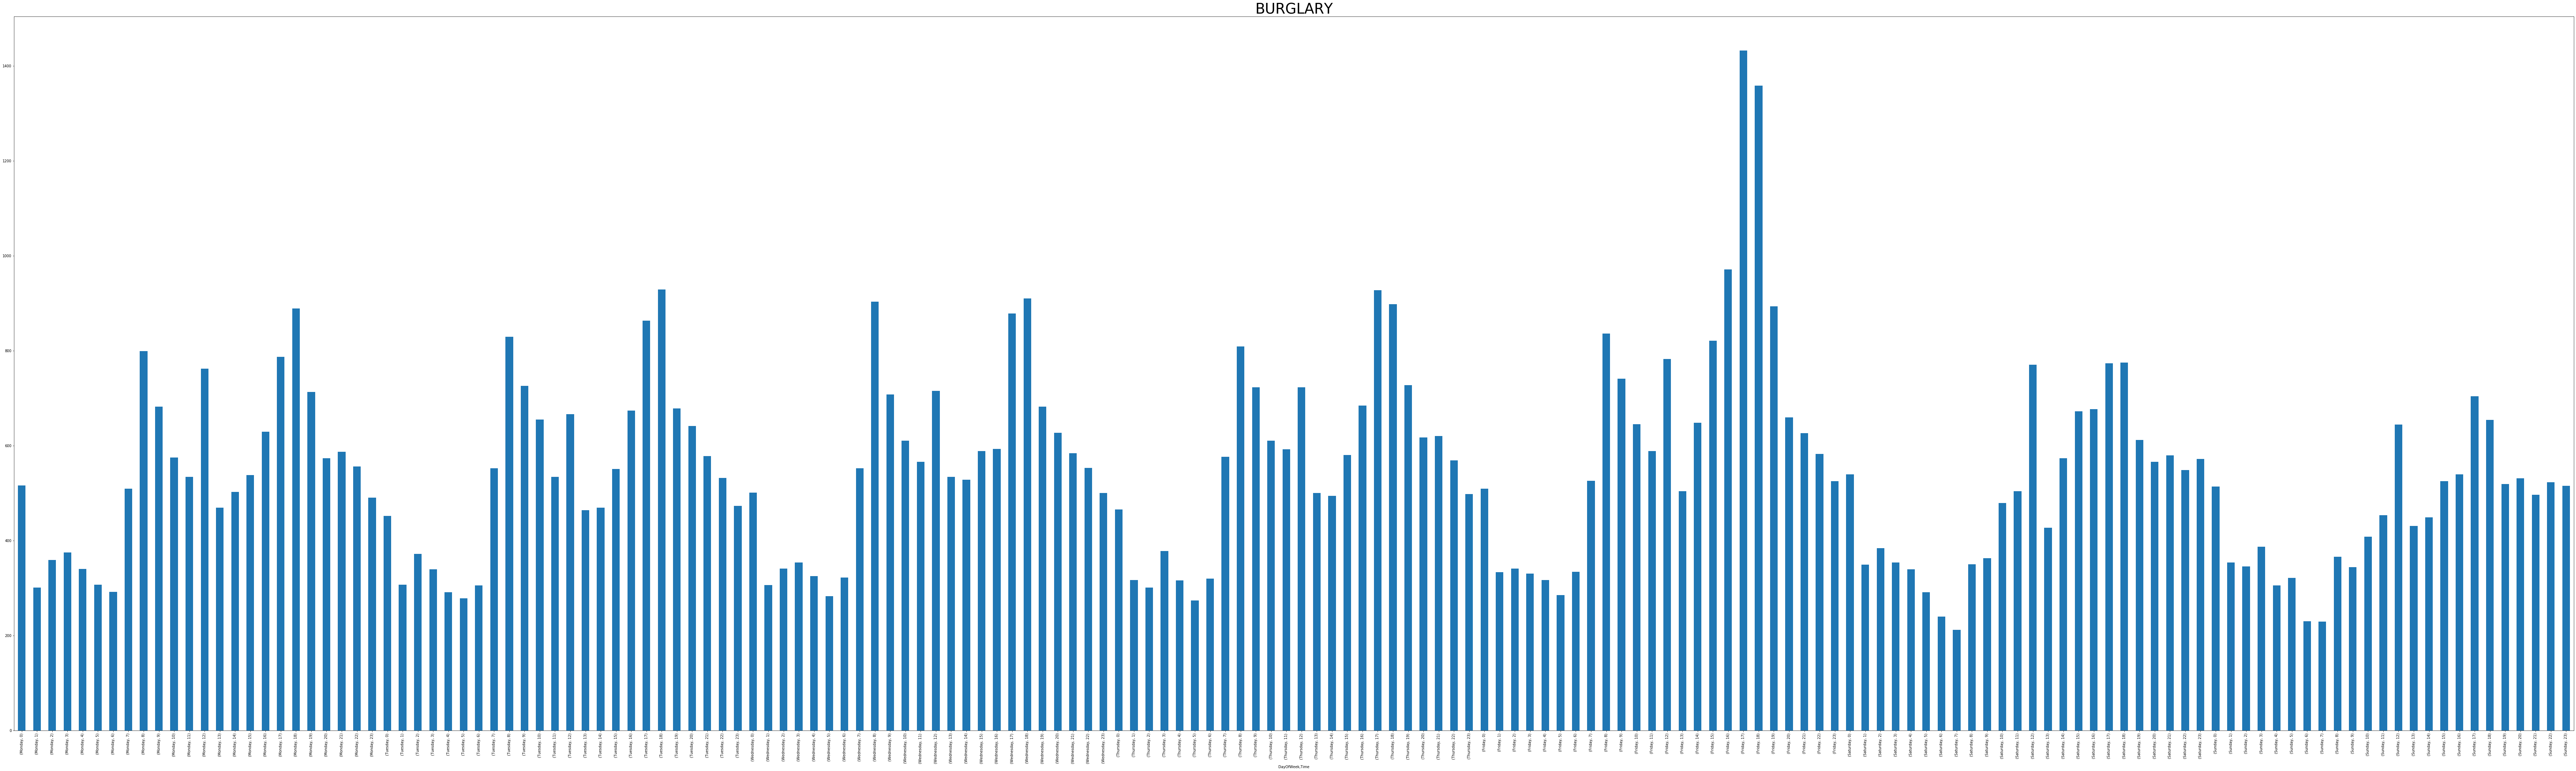

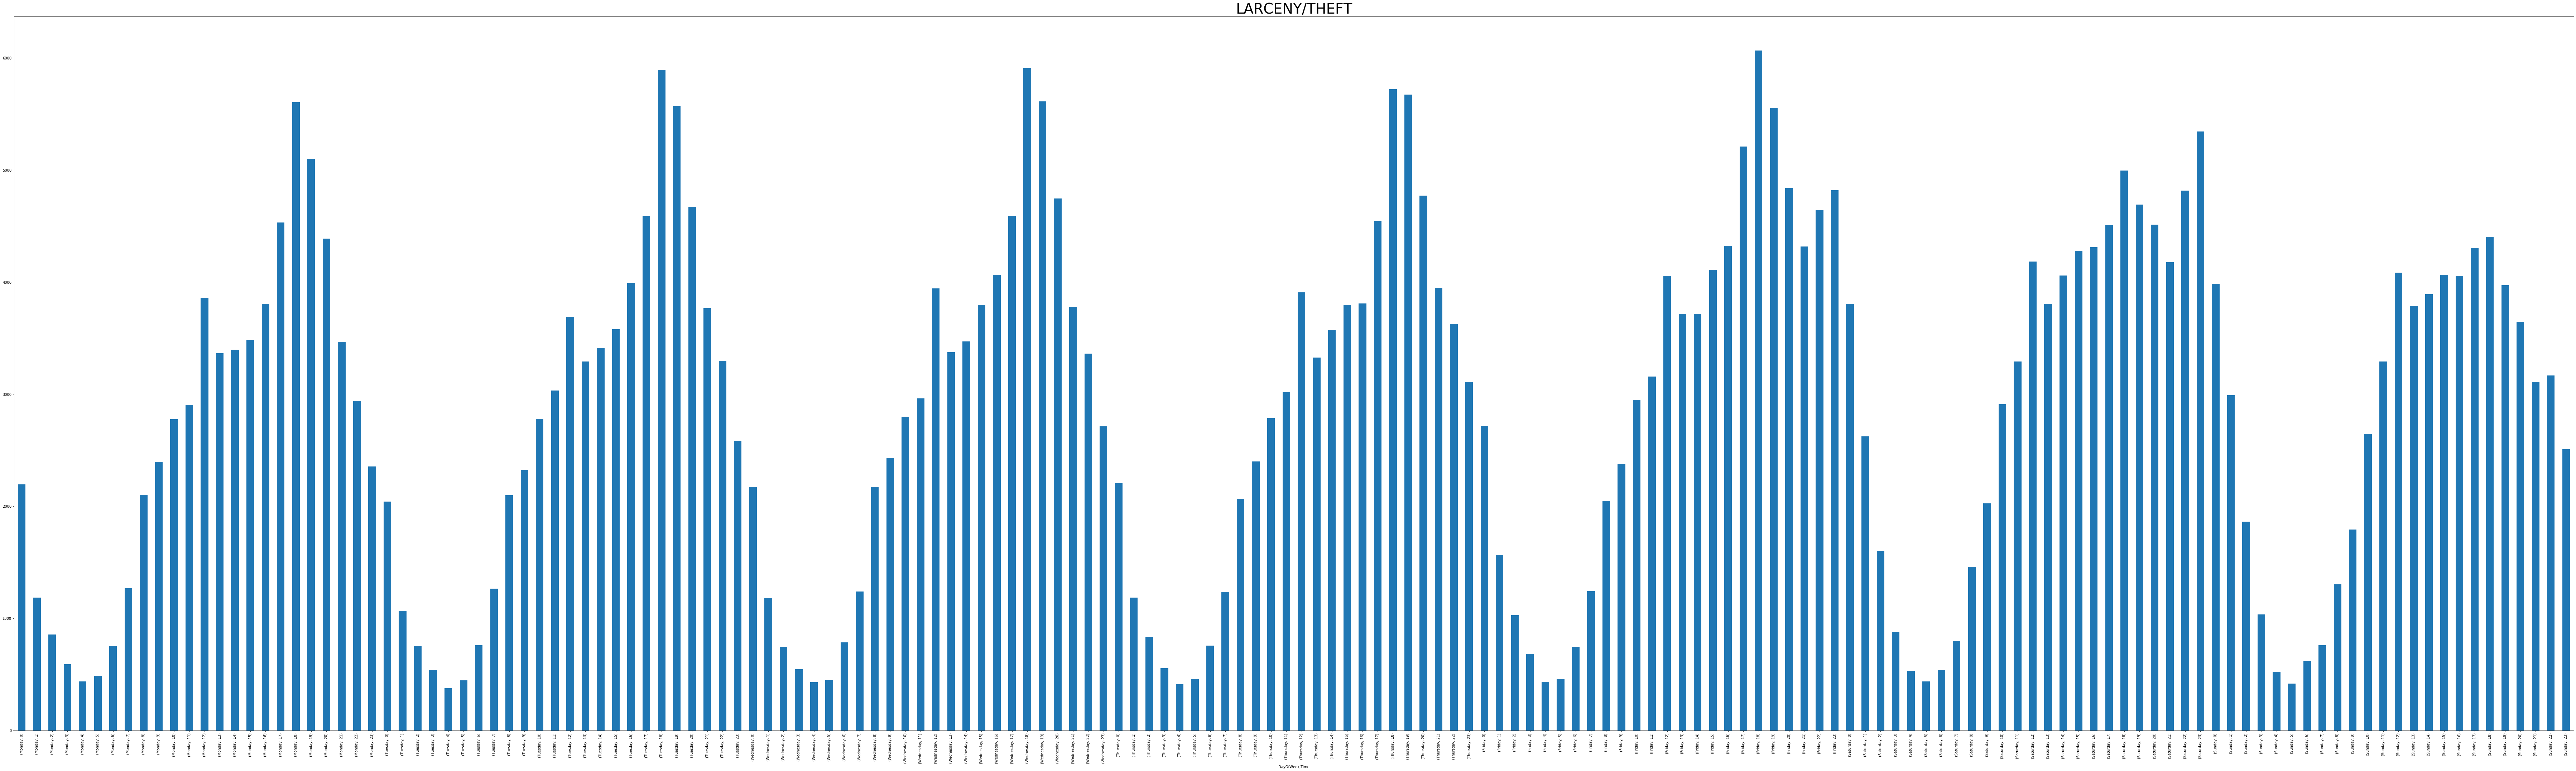

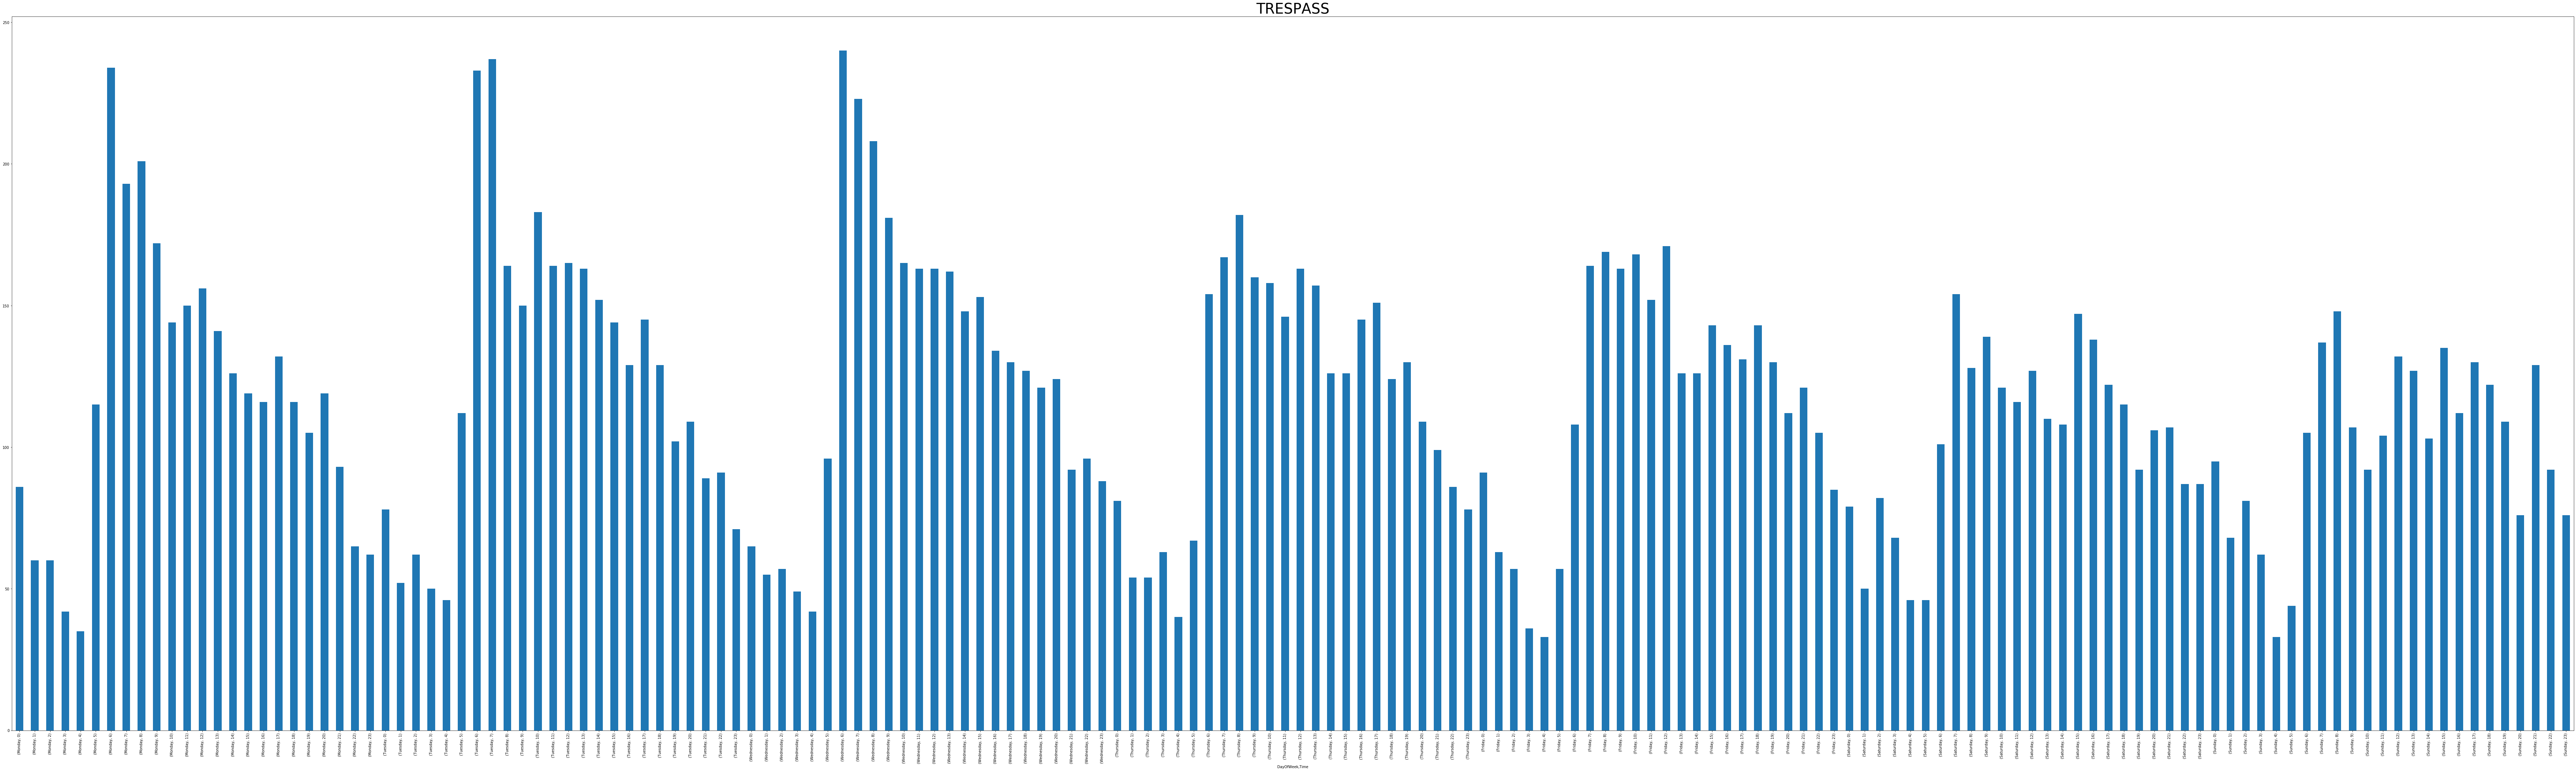

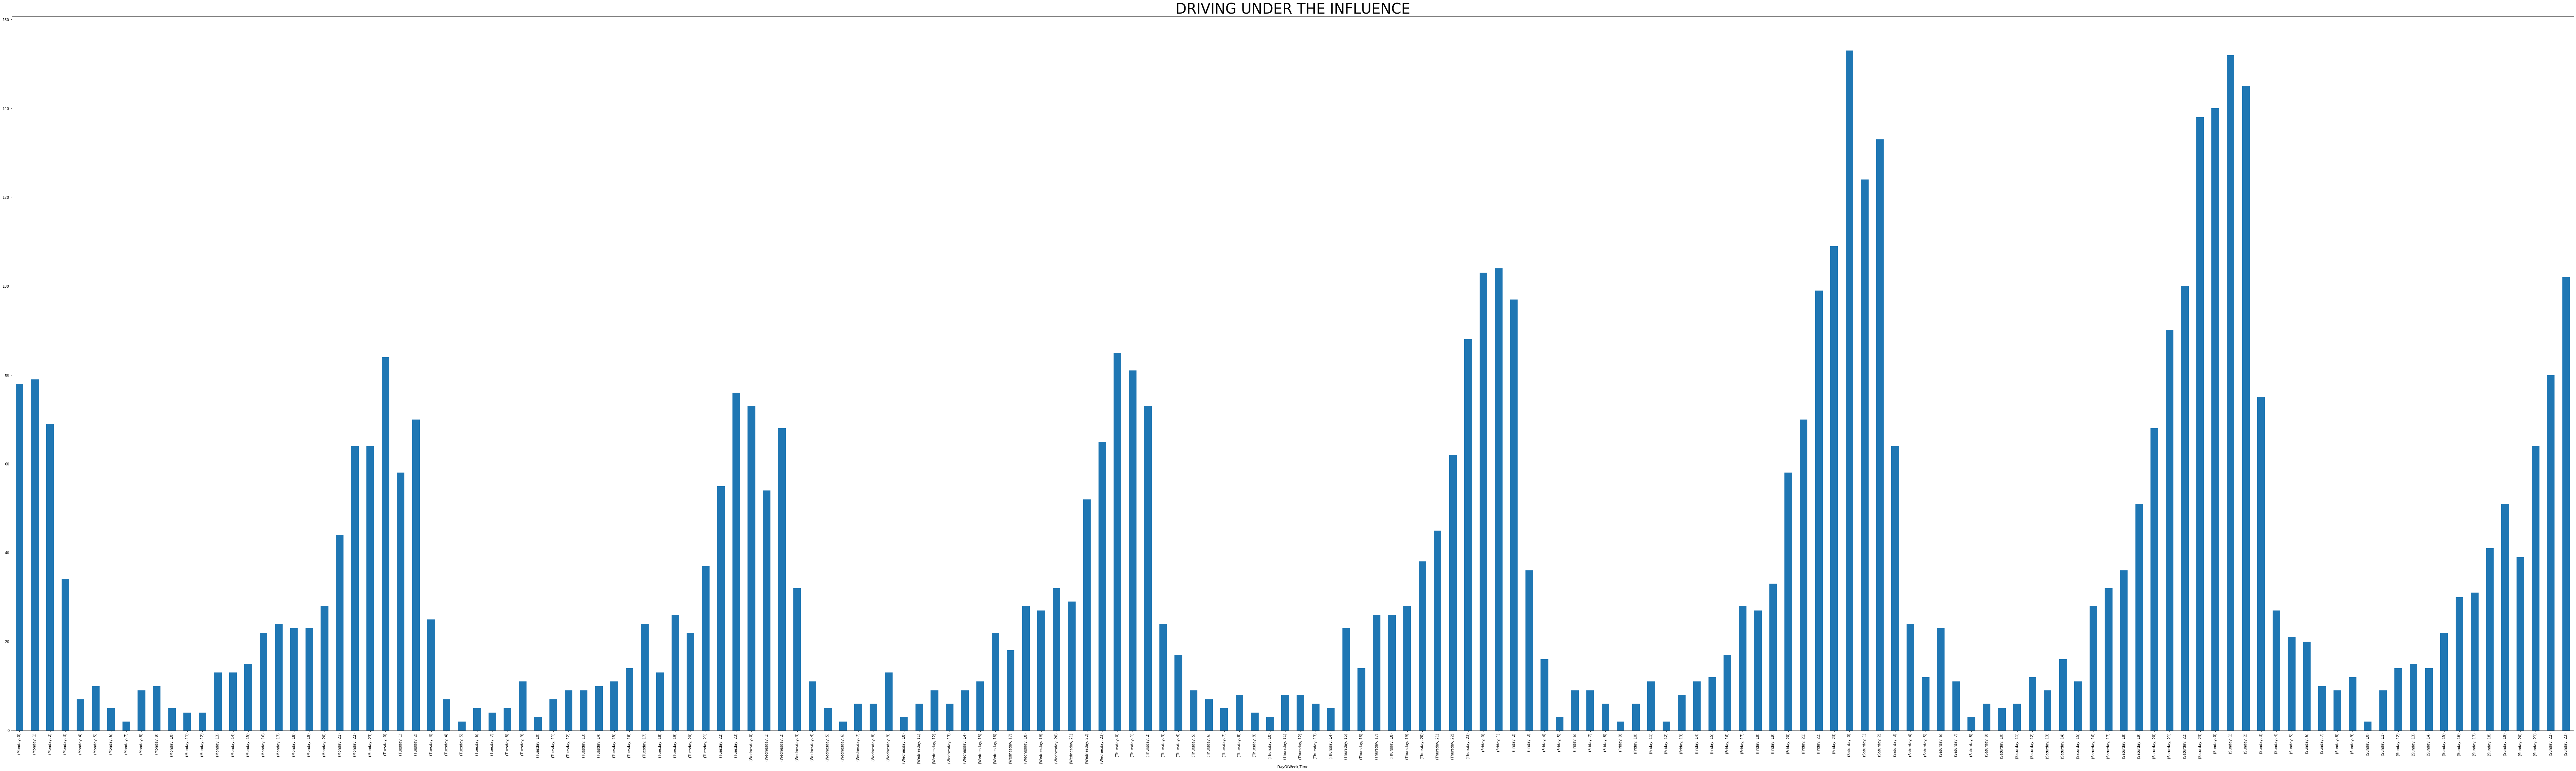

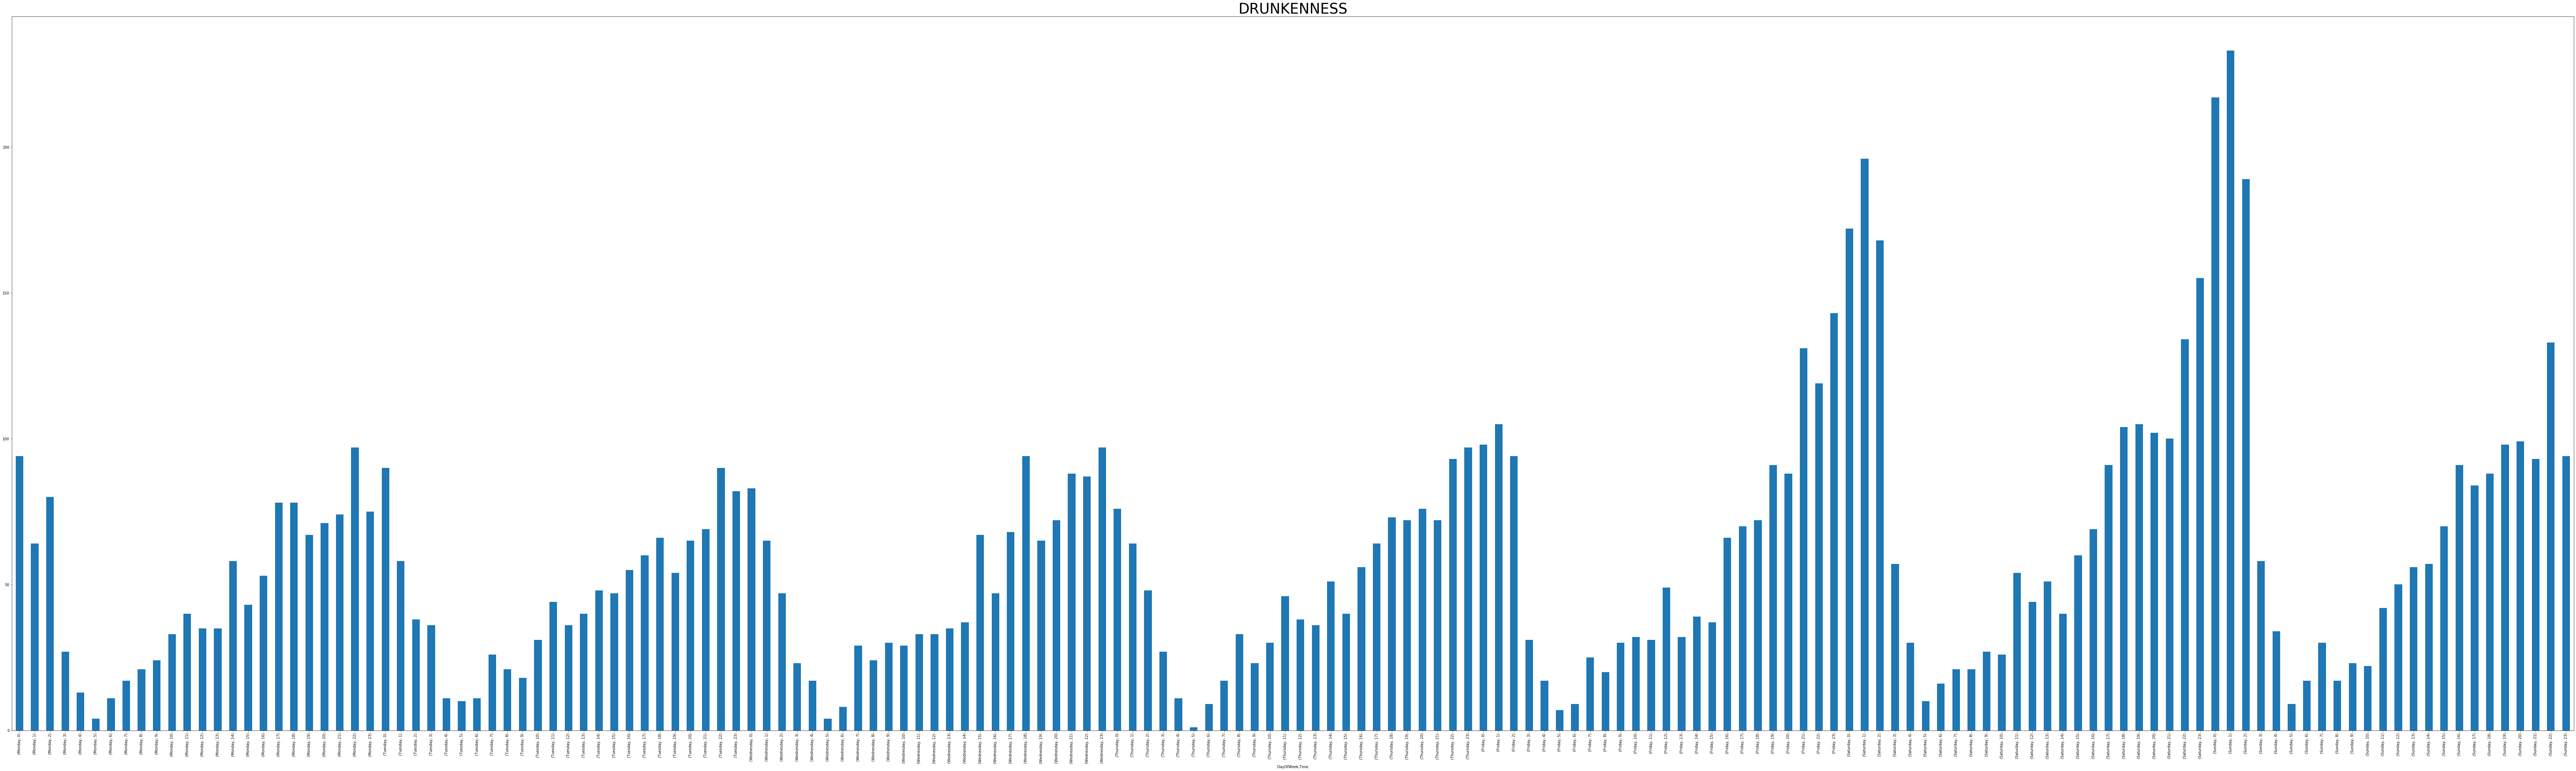

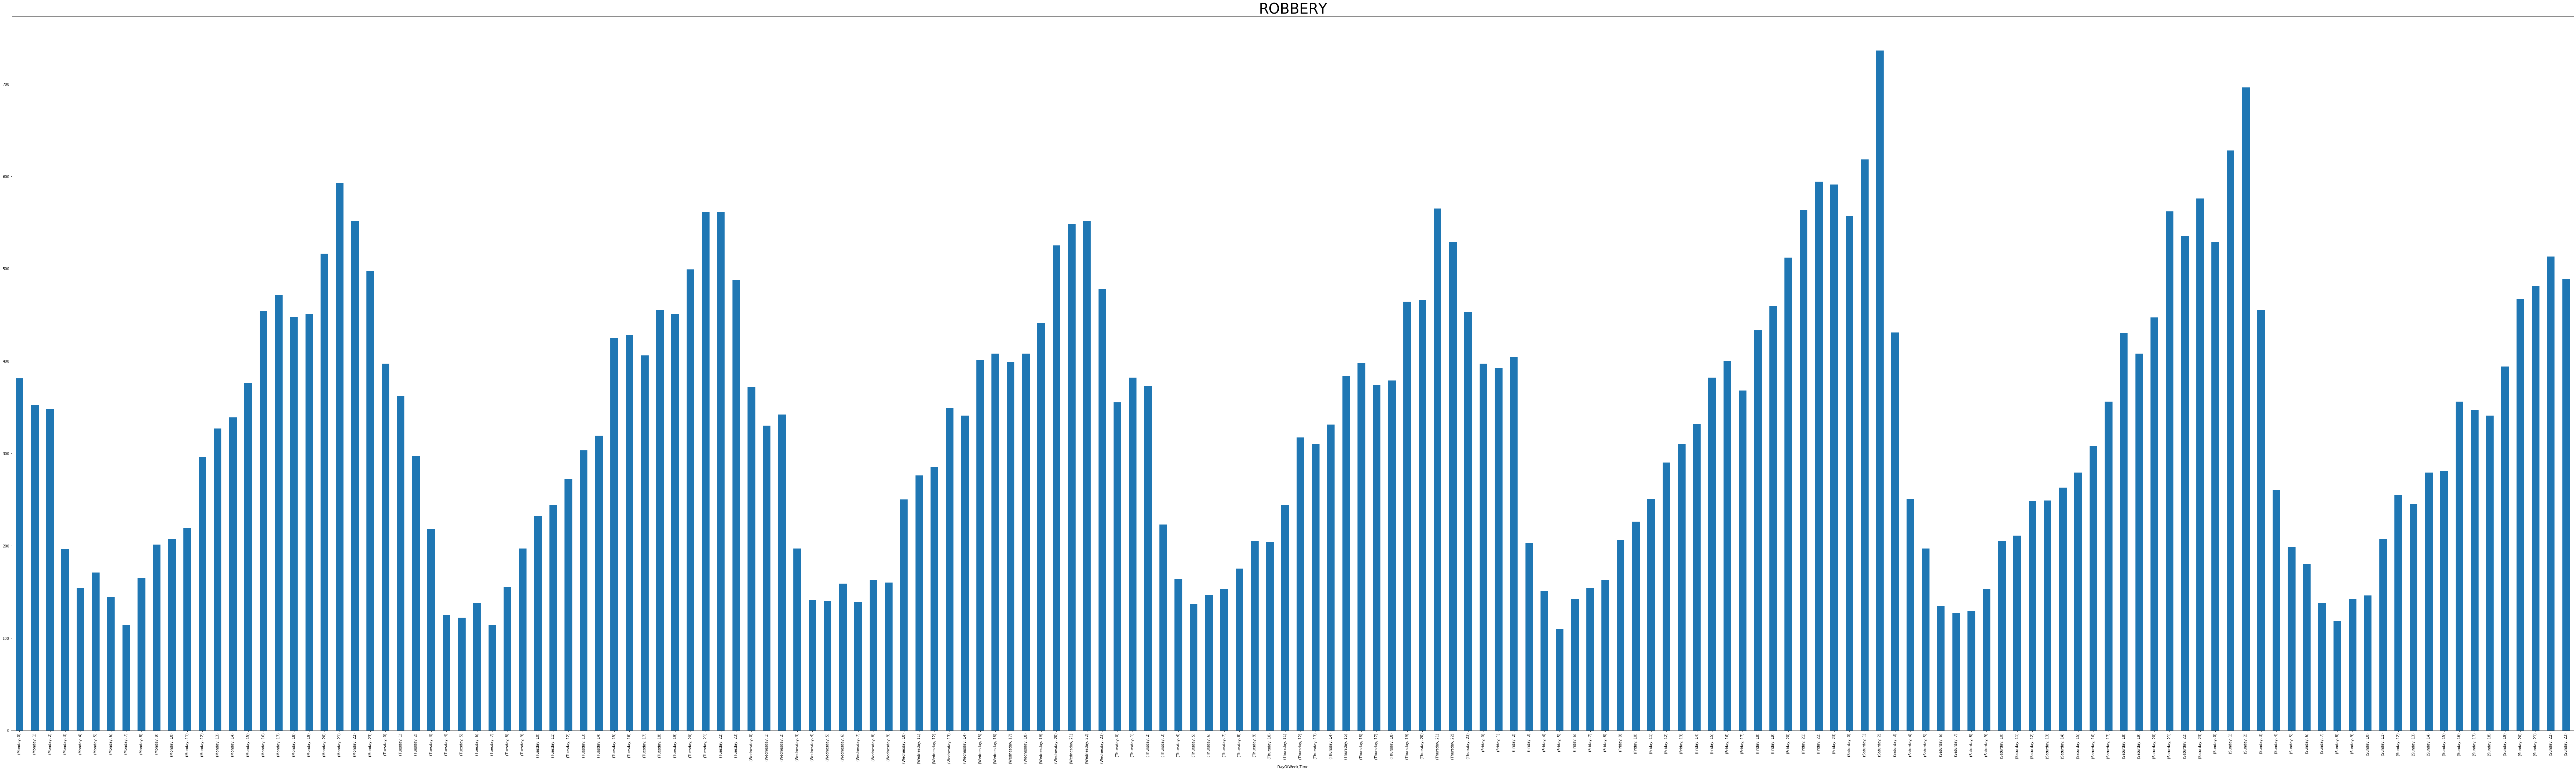

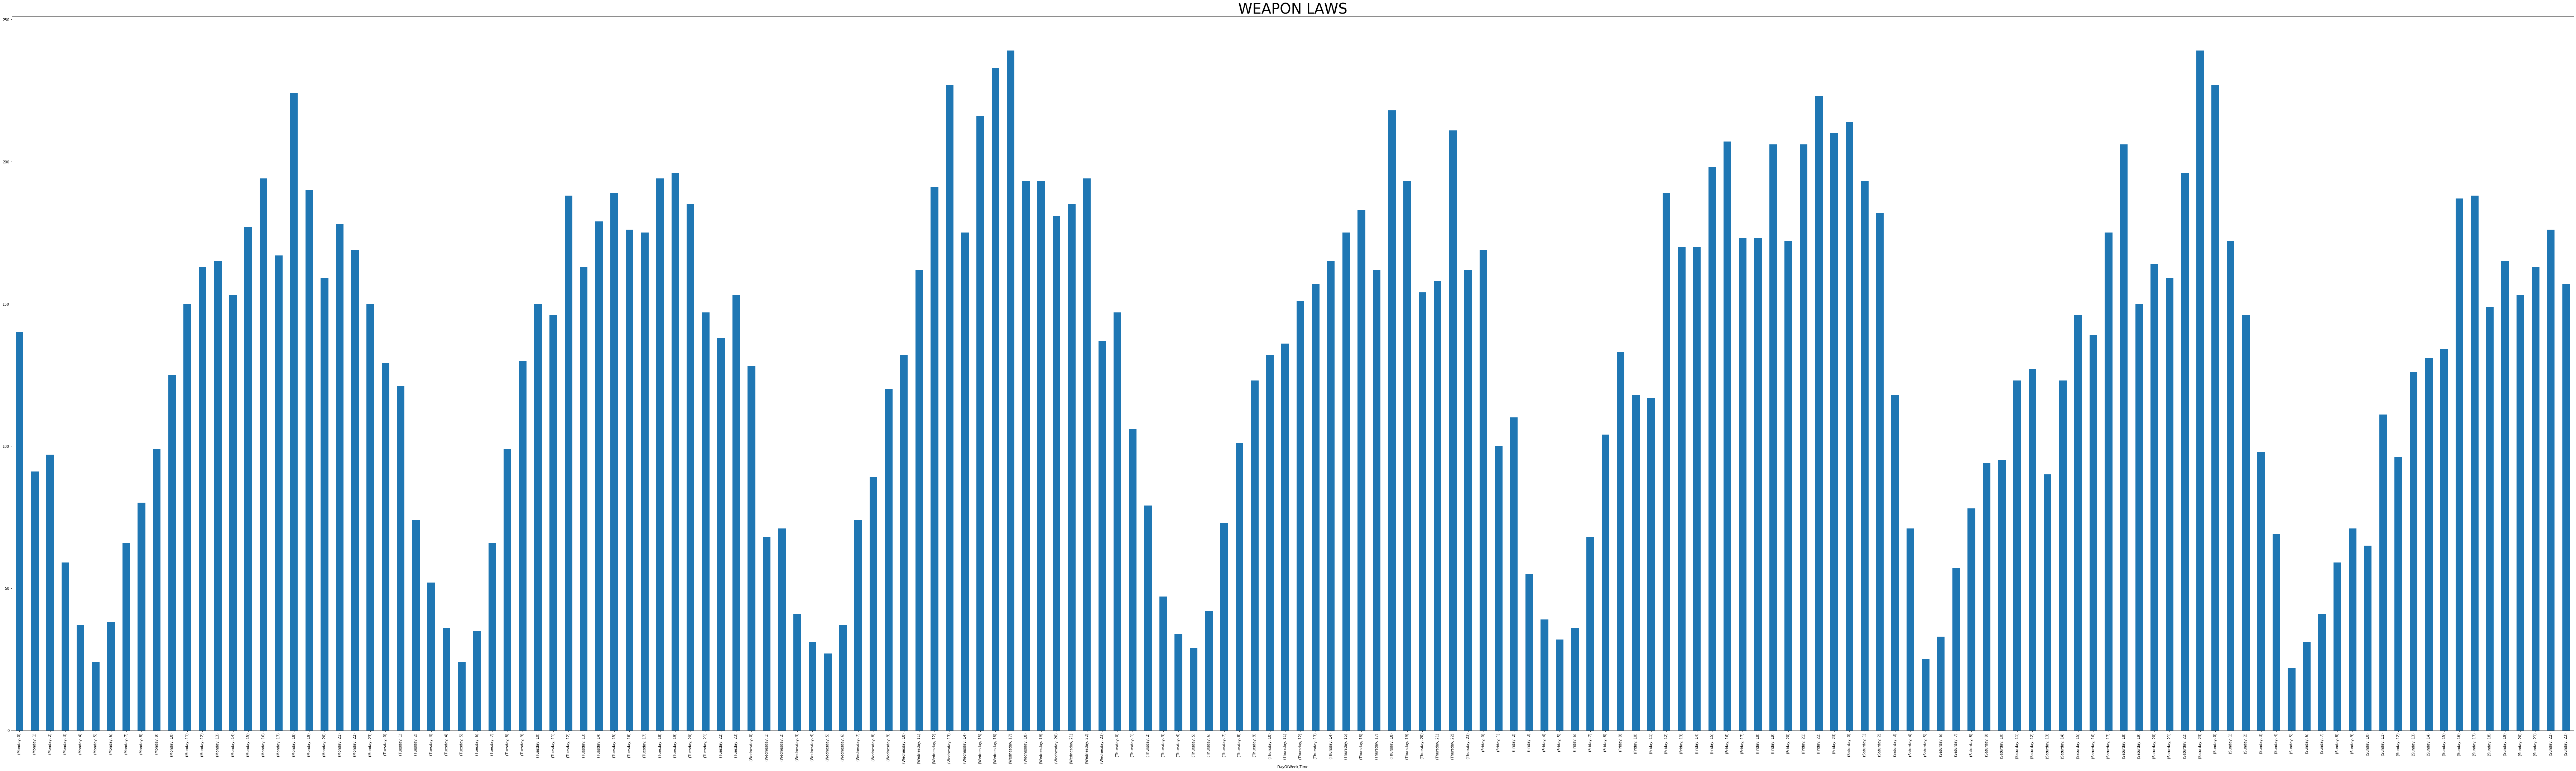

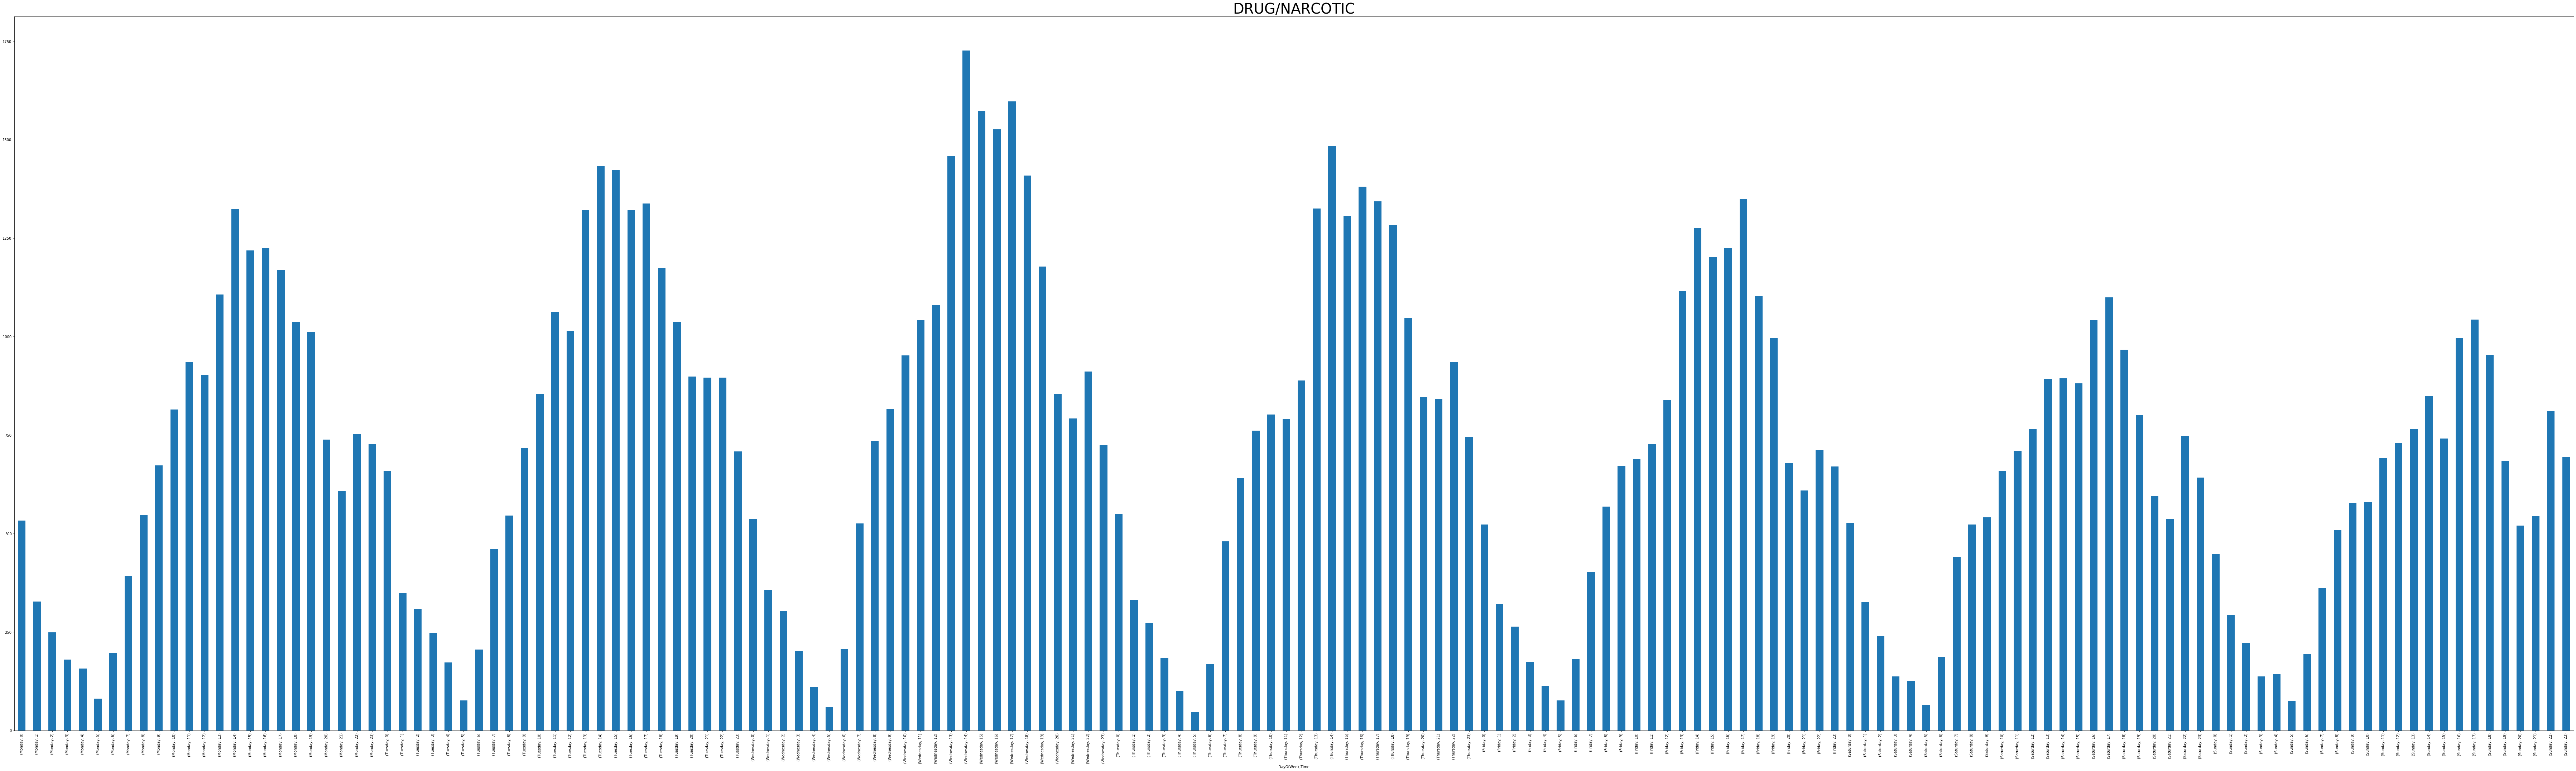

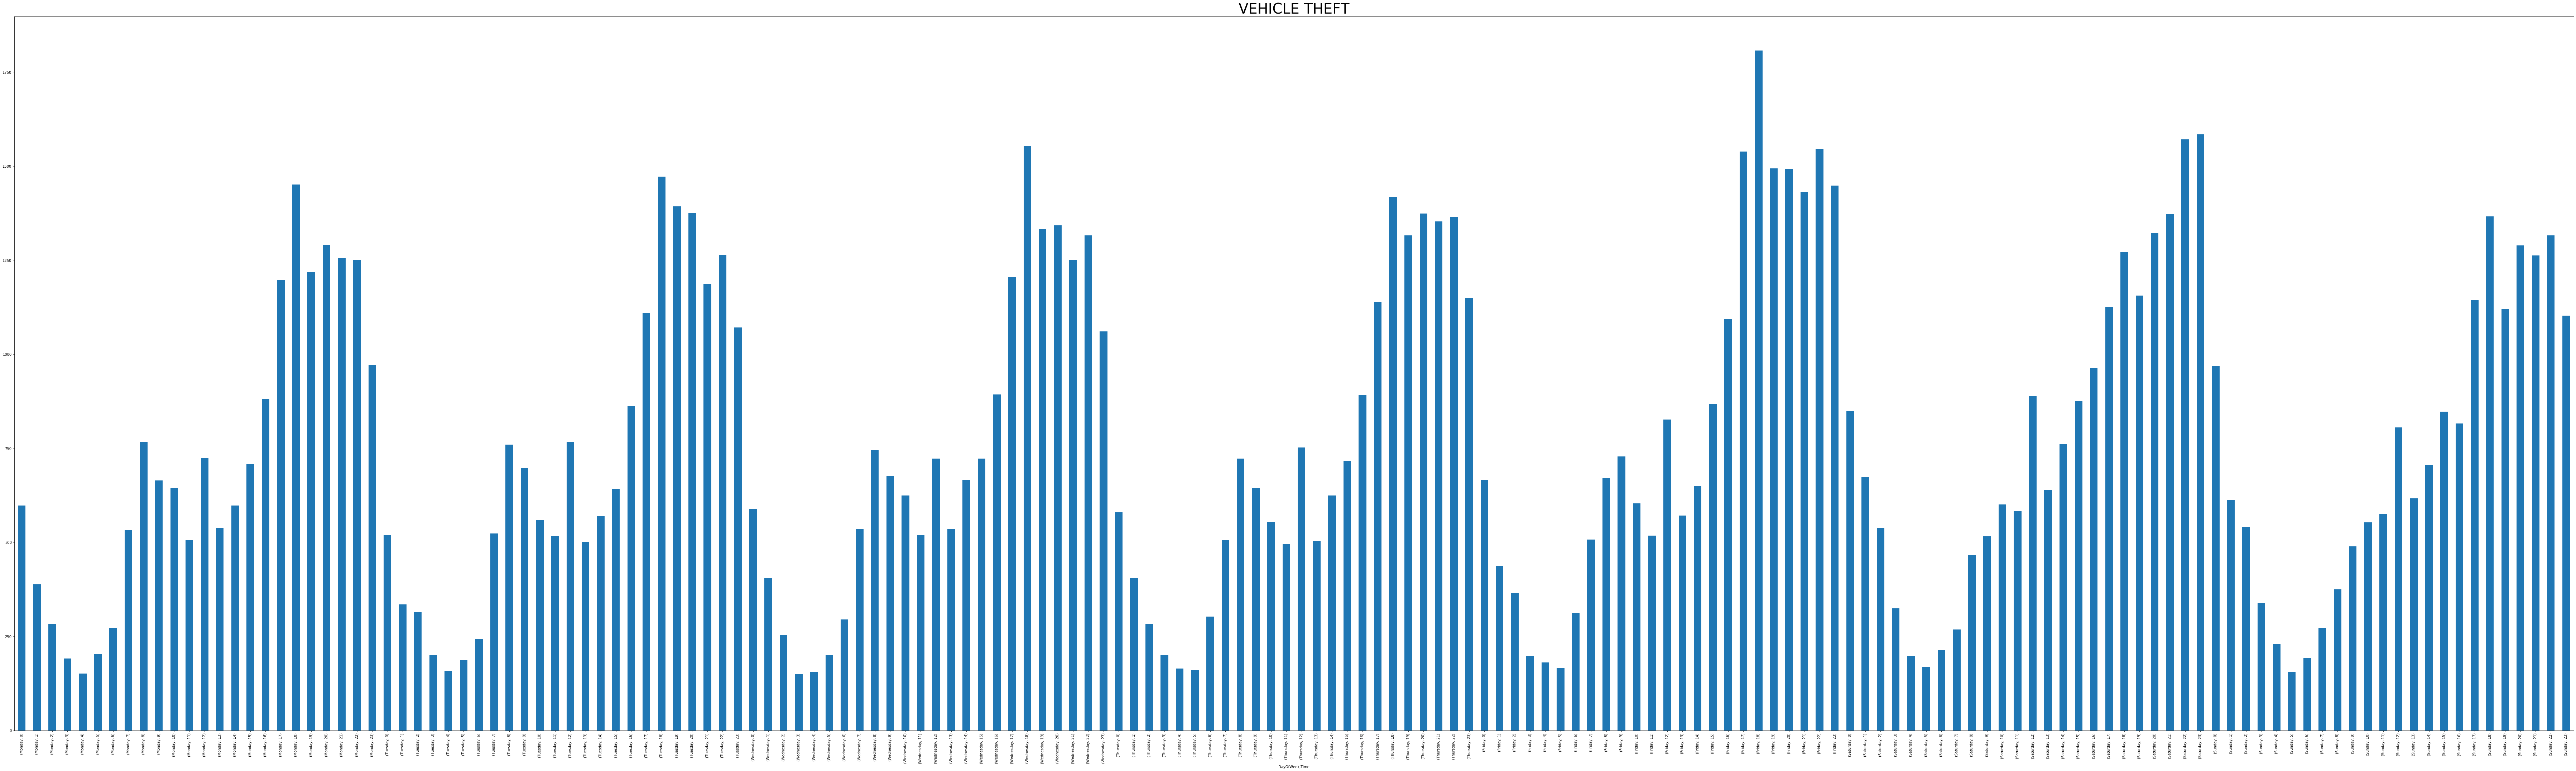

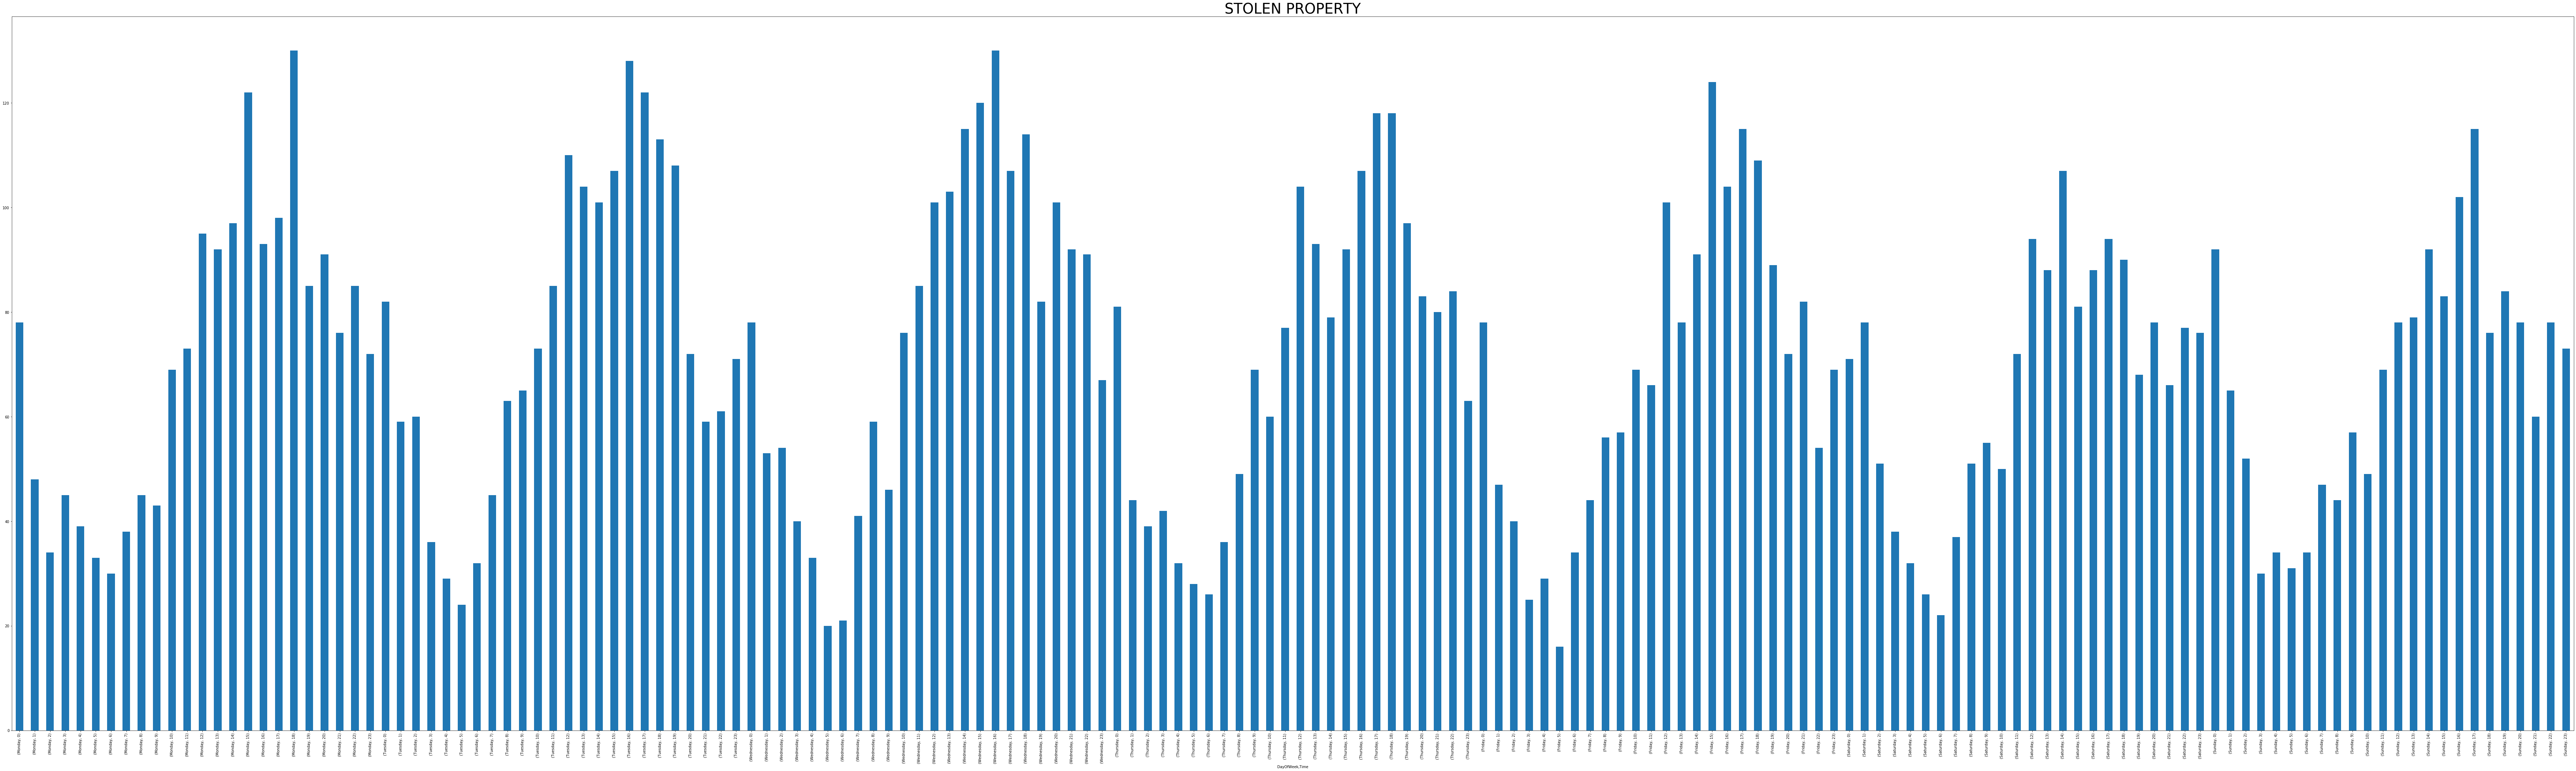

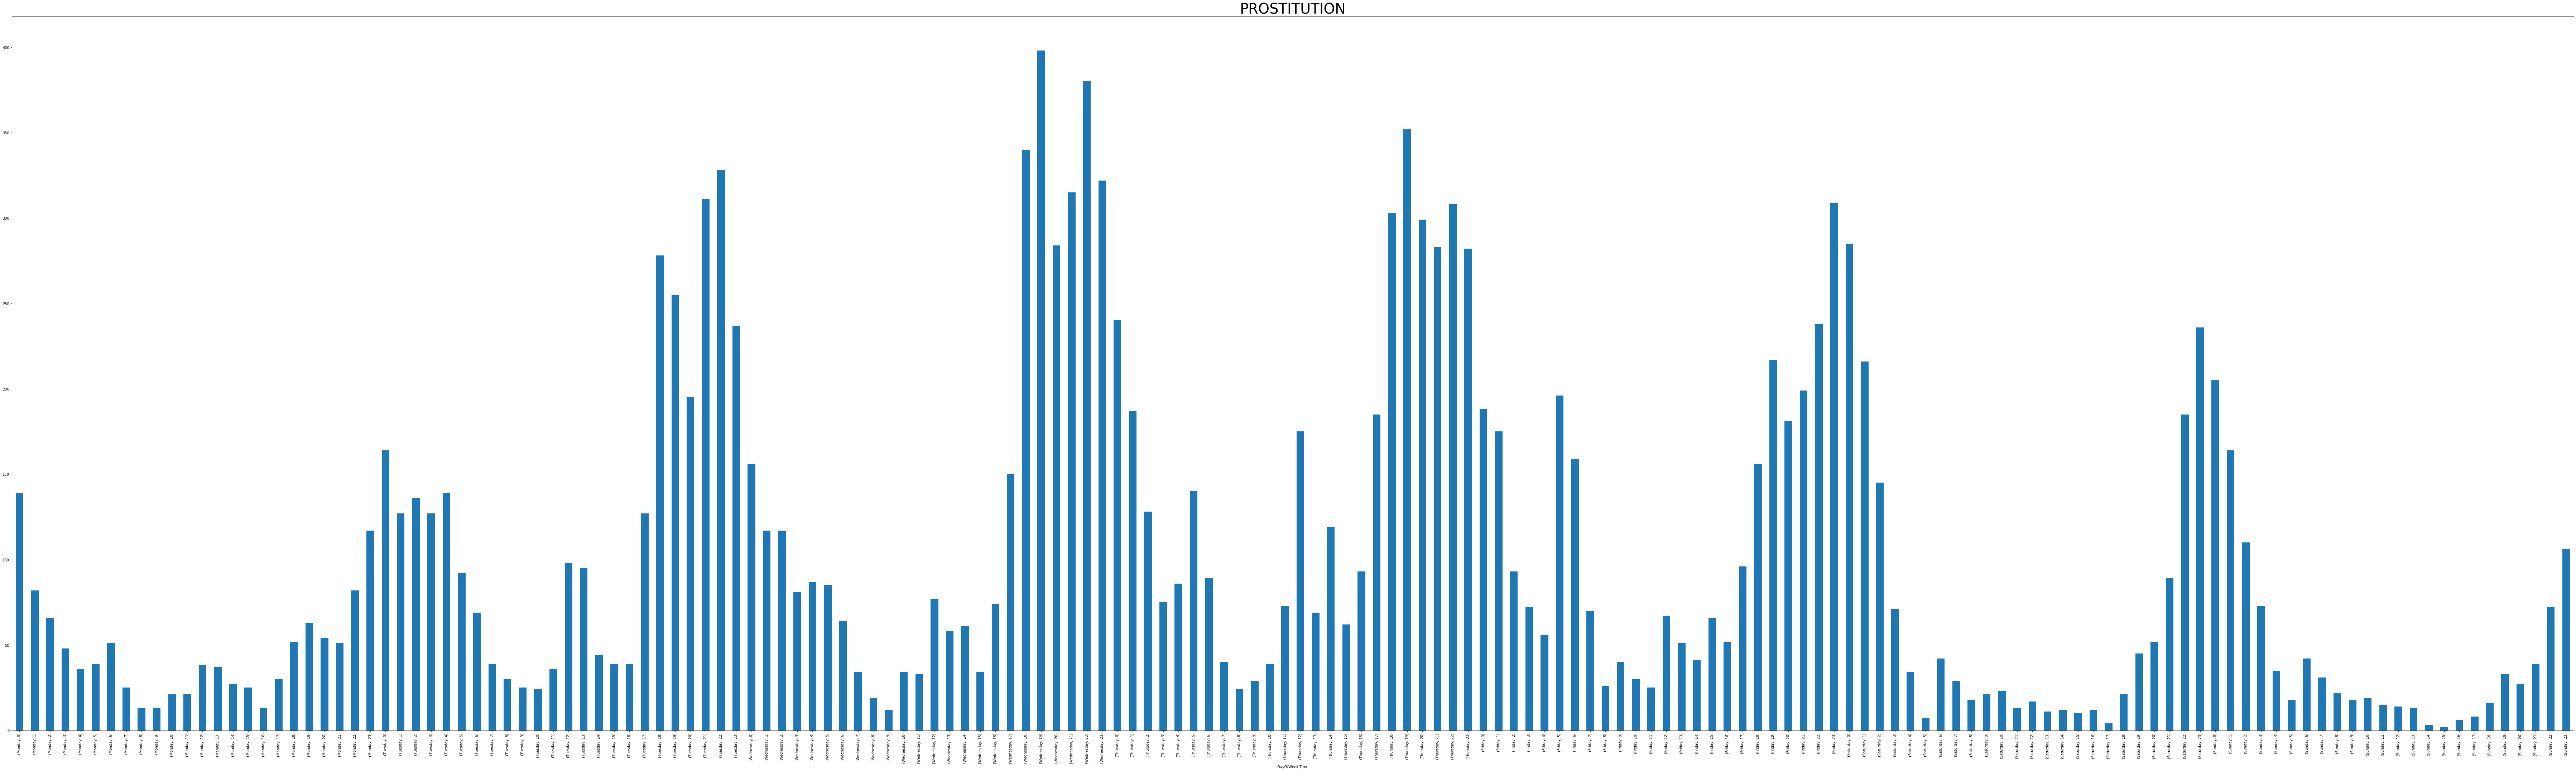

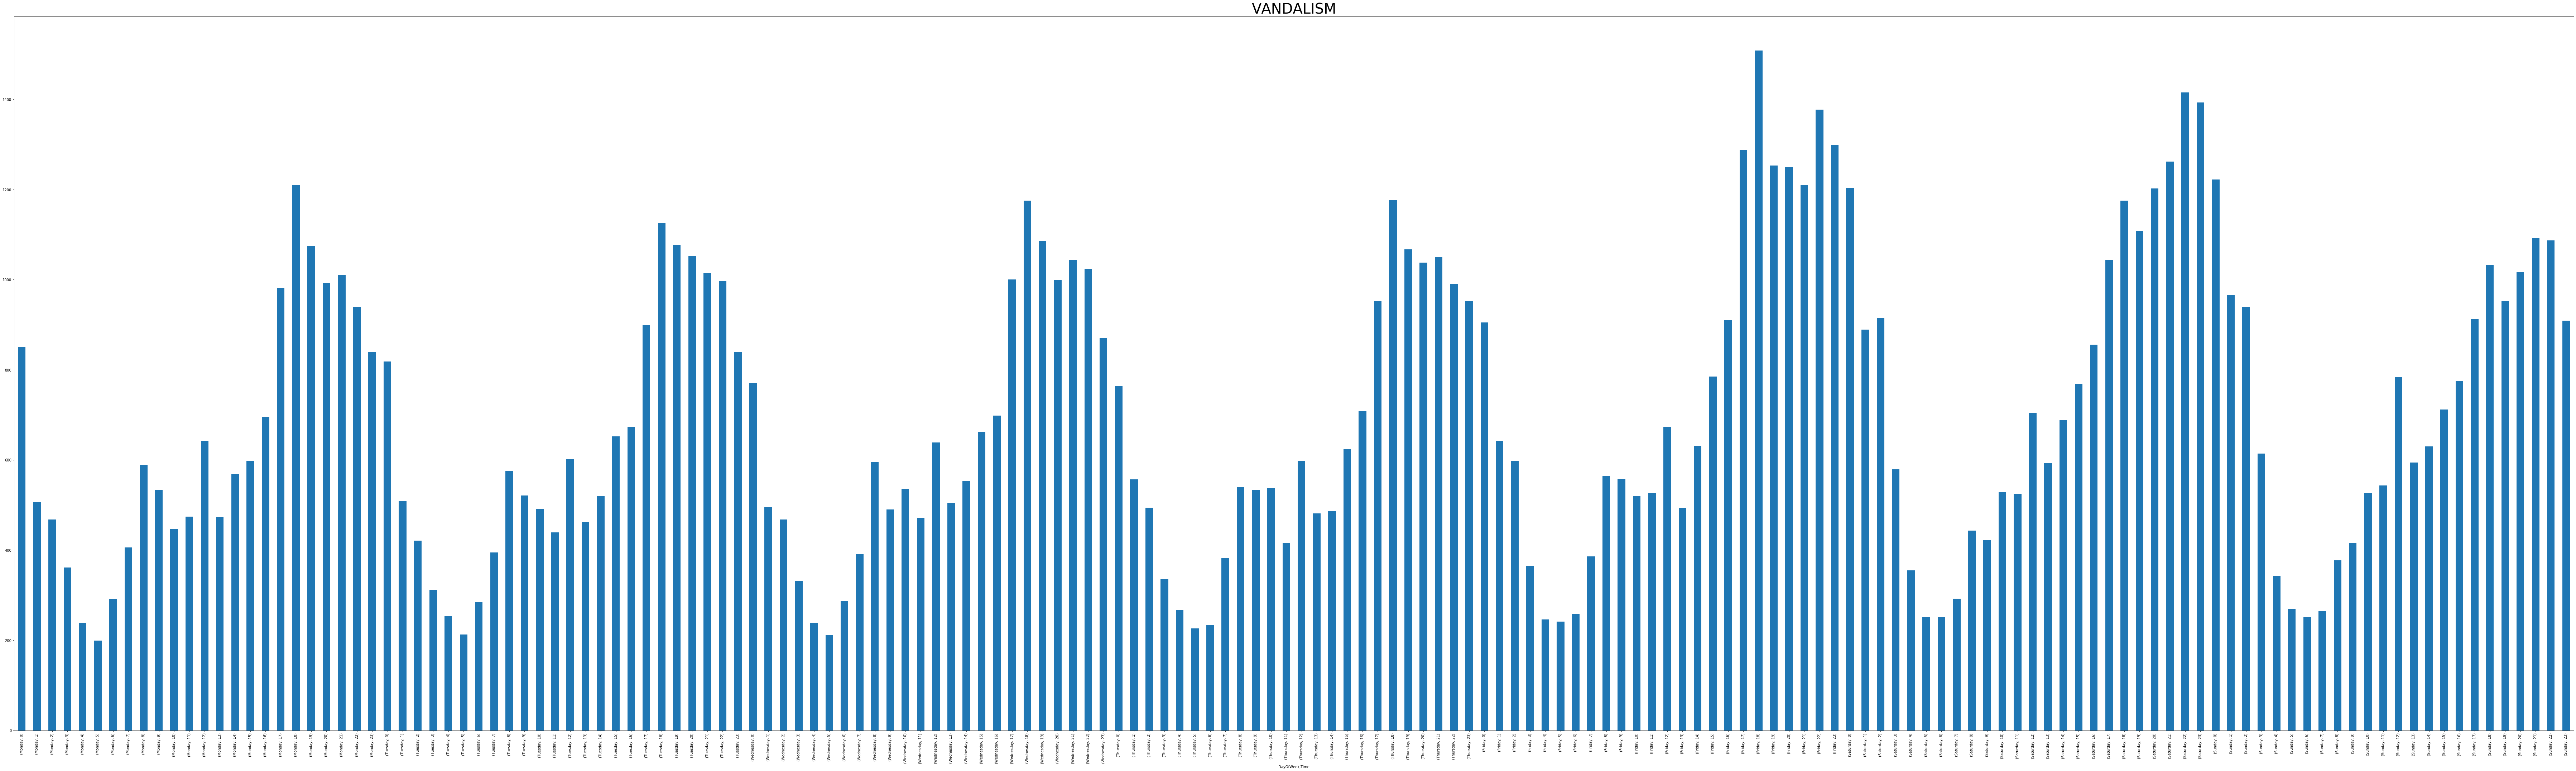

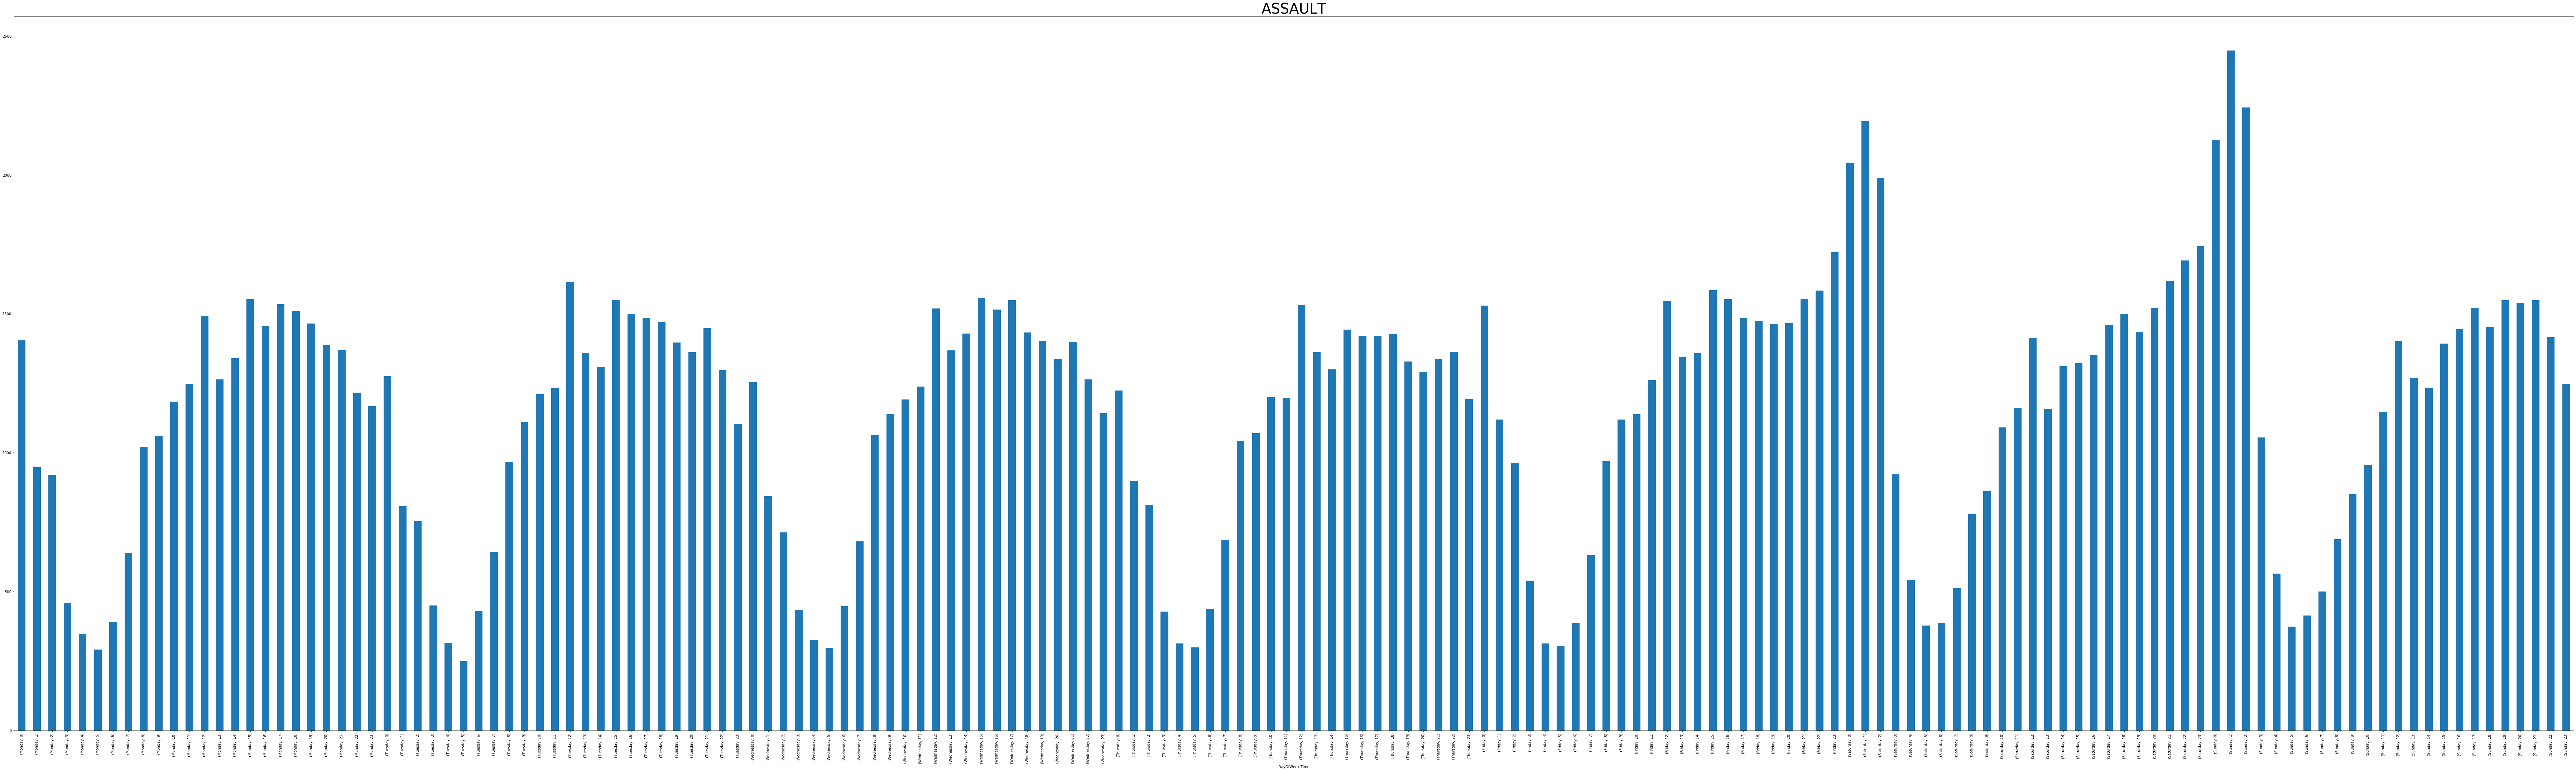

In [74]:
# plt.figure(figsize=(25,25))

for i, elem in enumerate(focuscrimes):
#     plt.subplot(7,2,i+1)
    plt.figure(figsize=(100,30))
    df_hour = df[df['Category'] == elem]
    
    df_hour.groupby(['DayOfWeek',df['Time'].dt.hour]).size().plot(kind='bar')

    plt.title(elem,fontsize=40)
    plt.tight_layout()
    plt.show()

# Part 2

$\textit{What is the difference between data and metadata? How does that relate to the bike-example?}$
Data is content, and metadata is context. Data is a collection of information such as observations, measurements and facts. It gives you the ability to discover patterns and trends. Metadata is often describes as "data on data". Metadata refers to specific details of the data. Metadata allows for greater data quality and discovery, and allowing for better understand of the data since it gives context to the data.

 




$\textit{Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not.
Mention something that the human eye is very good at. Can you think of something that is difficult for the human eye. Explain why your example is difficult.}$
Sune states the eye is a great tool for data analysis and give the example of outlier detection such as identifying a tigers tale sticking out on the road. We agree in this statement that the eyes ability to detect patterns and outliers plays an important role in evolution and human survival. In data science the statistical values such as mean and variance can trick one as it was seen in´exercise BLA BLA, where it was observed the different graphs had same statistical values but in a graphical illustration it can quickly be detected by the eye that the data is very different.   

The eye lacks the ability to process raw data. It is very dificult to find patterns in raw data and thus nescessarily to use visual tools. E.g finding correlation between different data is very difficult to see from raw data but in a simple scatter plot it can quickly be observed. 



$\textit{Simpson's paradox is hard to explain. Come up with your own example - or find one on line.}$
Simpson's paradox is a phenomenon in probability and statistics, in which a trend appears in several different groups of data but disappears or reverses when these groups are combined.


$\textit{In your own words, explain the difference between exploratory and explanatory data analysis.}$
Exploratory analysis is the initial step in data analysis. It usually consist of getting to know the data by simple statistics and data visuliazation to use the human eye to find patterns in the data. Finding trends, correlations and outliers. Exploratory analysis is often the preperation for further in depth research since the initial analysis hopefully shows interesting trends/patterns as a base for further research. It explore the data.

Explanatory analysis seeks to explain the findings from exploratory by answering "why" and "how". It is thus a more in depth analysis of patterns discovered. 



$\textit{Excercise: Questions for the second video lecture.}$

$\textit{As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation. Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?}$

Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related. 1 indicates a total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.

a Pearson correlation between variables X and Y is calculated by:
$$\rho_{X,Y}=\frac{\text{cov}(X,Y)}{\sigma_X\sigma_Y}=\frac{\sum_{i=1}^n(X_i-\overline{X})(Y_i-\overline{Y})}{\sqrt{\sum_{i=1}^n(X_i-\overline{X})^2}\sqrt{\sum_{i=1}^n(Y_i-\overline{Y})^2}}$$

$\textit{What is the difference between a bar-chart and a histogram?}$
Visually there is a gap between the bars in a bar-chart and not in a histogram. A histogram shows a frequency distribution of numerical data while a bar-chart uses bars to distinct different categories of data. Does the skewness play an important role in a histogram but is irrelevant in a bar-chart since the interpretation of a bar chart is not effected by sorting the bars. In a histrogram numbers are caractorised together to represent ranges of the data, while in a bar plot, bars are considered independet variables. 

$\textit{I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it.}$
When using a histogram it is important to define an appropriate bin width and bin count. If this is not done with cautions a lot of information can get lost in the plot. If the bins are to wide important details in the distribution can be lost while too narrow can cause a lot of noise. The width of the bin should all be equal for easier interpretation of the data. To determine the bin size different methods can be used.  



From [Histogram-The Ultimate Guide of Binning](https://www.answerminer.com/blog/binning-guide-ideal-histogram?fbclid=IwAR0xOJOqAFipCPiy790WaUxKX8RhBxEm_jIdK0KsSdou927mpbHh92uYGuQ) different methods to determine bin size is presented: Square-root, Sturges, Rice, Scott and Freedman-Diaconis. Simple method is taken the square-root method: $\text{bins}=\sqrt{n}$. A more advanced method is Scott from 1979: $$\text{bins}=\frac{max(vaues)-min(values)}{3.5\frac{stdev(values)}{\sqrt[3]{n}}}$$

